# Loading halos and subhalos, Making tables

In [2]:
import illustris_python as il
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import astropy.stats as astats
import time as time
t0 = time.time()
plt.rcParams['figure.facecolor'] = 'w'


basePath = '/Users/TaraD/TNG-300_1/output' #Folder with snapshots and group catalogs
snapshot_ind = 66

# Loading header file
header = il.groupcat.loadHeader(basePath, snapshot_ind)
#halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("Header File Keys: ")
print('\n'.join(list(header.keys())))

# Loading halo group quantities 
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
halo_keys = (list(halo_grp.keys()))
print("\nHalo Group File Keys: ")
print('\n'.join(halo_keys))

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
subhalo_keys = (list(subhalo_grp.keys()))
print("\nSubHalo Group File Keys: ")
print('\n'.join(subhalo_keys))
print(time.time()-t0)

Header File Keys: 
Ngroups_ThisFile
Nsubgroups_ThisFile
Nids_ThisFile
Ngroups_Total
Nsubgroups_Total
Nids_Total
NumFiles
Time
Redshift
HubbleParam
BoxSize
Omega0
OmegaLambda
FlagDoubleprecision
Git_commit
Git_date

Halo Group File Keys: 
count
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200

SubHalo Group File Keys: 
count
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloH

In [3]:
import time as time
t0 = time.time()
from astropy.table import Table,join,Column


useless_keys_subhalo = ['count','SubhaloBHMdot','SubhaloGasMetalFractionsHalfRad',
                'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad',
                'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted',
               'SubhaloGasMetallicityMaxRad','SubhaloGasMetallicitySfr','SubhaloGasMetallicitySfrWeighted', 
               'SubhaloIDMostbound', 'SubhaloSFRinHalfRad','SubhaloSFRinMaxRad', 'SubhaloSFRinRad',
               'SubhaloStarMetalFractionsHalfRad','SubhaloStarMetalFractionsMaxRad']
print(subhalo_keys)
for i in range(0, len(useless_keys_subhalo)):
    if useless_keys_subhalo[i] not in subhalo_keys:
        print(useless_keys_subhalo[i])
    else:
        subhalo_keys.remove(useless_keys_subhalo[i])
print(type(subhalo_grp))
print(subhalo_grp.keys())
[subhalo_grp.pop(key) for key in useless_keys_subhalo] 

 

subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))

subhalo_table = Table(list(subhalo_grp.values()), names=(subhalo_keys))

subhalo_table.add_column(Column([x for x in range(len(subhalo_table))]), name='Index' ,index=0)

subhalo_table.add_column(subhalo_table["SubhaloMassInHalfRadType"][:,4], name=str("StellarMassHalfRad"))
subhalo_table.add_column(subhalo_table["SubhaloMassType"][:,4], name=str("StellarMass"))

useless_keys_halo = ['count','GroupBHMdot','GroupGasMetalFractions', 'GroupStarMetalFractions']   
for i in range(0, len(useless_keys_halo)):
    halo_keys.remove(useless_keys_halo[i])

[halo_grp.pop(key) for key in useless_keys_halo]
halo_table = Table(list(halo_grp.values()), names=(halo_keys))

halo_table.add_column(Column([x for x in range(len(halo_table))]), name='SubhaloGrNr' ,index=0)

subhalo_table = join(subhalo_table, halo_table, keys='SubhaloGrNr', join_type='left')

subhalo_table.add_column(Column(subhalo_table['GroupFirstSub'] == subhalo_table['Index']),name=str("IsCentral"))
print(len(subhalo_table))


print(time.time()-t0)
print('\n'.join(subhalo_table.colnames))


['count', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', 'SubhaloStarMetallicityMaxRad

In [4]:
print(len(subhalo_table))
print(subhalo_table.colnames)
print(subhalo_table[:10])

#is_central = np.array([0]*len(subhalo_table),dtype=bool)
#temp = halo_grp['GroupFirstSub']>-1
#groupfirstsub = np.array(halo_grp['GroupFirstSub'])
#is_central[groupfirstsub[temp]]=True
#subhalo_table.add_column(Column(is_central),name=str("IsCentral"))
#subhalo_table.add_column(subhalo_table["SubhaloMassInHalfRadType"][:,4], name=str("StellarMassHalfRad"))
#subhalo_table.add_column(subhalo_table["SubhaloMassType"][:,4], name=str("StellarMass"))
'''
is_field = np.array([0]*len(subhalo_table),dtype=bool)
temp2 = subhalo_table['GroupNsubs']==1
is_field = (subhalo_table['GroupNsubs'])[temp2]
subhalo_table.add_column(Column(is_field),name=str("IsField"))
is_satellite = np.array([0]*len(subhalo_table),dtype=bool)
temp3 = subhalo_table['IsCentral']==False
is_satellite = (subhalo_table['IsCentral'])[temp3]
subhalo_table.add_column(is_satellite,name=str("IsSatellite"))
'''
#print(len(subhalo_table))
#print(subhalo_table.colnames)
#print(subhalo_table[:10])

15904796
['Index', 'SubhaloBHMass', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', 'SubhaloStarMetallicityMaxRad', 'SubhaloStellarPhotometrics', 'SubhaloStellarPhotometricsMassInRad', 'SubhaloStellarPhotometricsRad', 'SubhaloVel', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad', 'SubhaloWindMass', 'StellarMassHalfRad', 'StellarMass', 'GroupBHMass', 'GroupCM', 'GroupFirstSub', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit20

'\nis_field = np.array([0]*len(subhalo_table),dtype=bool)\ntemp2 = subhalo_table[\'GroupNsubs\']==1\nis_field = (subhalo_table[\'GroupNsubs\'])[temp2]\nsubhalo_table.add_column(Column(is_field),name=str("IsField"))\nis_satellite = np.array([0]*len(subhalo_table),dtype=bool)\ntemp3 = subhalo_table[\'IsCentral\']==False\nis_satellite = (subhalo_table[\'IsCentral\'])[temp3]\nsubhalo_table.add_column(is_satellite,name=str("IsSatellite"))\n'

# Defining Functions

In [40]:
def basic_sub_cuts(subhalos, field):
    
    #subhalos = subhalos[field][subhalos['SubhaloFlag']]
    #subhalos = subhalos[subhalos['SubhaloMass']!=0]
    #subhalos = subhalos[subhalos['SubhaloMassType'][:,4]!=0]
    mask1 = subhalos['SubhaloStellarPhotometrics']<8e+36
    photo_mask = mask1[:,0]
    for i in range (1,8):
        photo_mask = photo_mask & mask1[:,i]
    #subhalos = subhalos[photo_mask]
    mask = (subhalos['SubhaloFlag'])&(subhalos['SubhaloMass']!=0)&(subhalos['SubhaloMassType'][:,4]!=0)&(photo_mask)
    return subhalos[field][mask]
#print(len(subhalo_grp[]))
def Bootstrap_Covariance(NDensity_list, Nb, R):
    halo_array3 = np.arange(0,len(NDensity_list))
    halo_boot = astats.bootstrap(halo_array3, bootnum=300, samples=None)
    resampled_list = []
    for b in range(0,300):
        mask_b = (np.array(halo_boot[b].astype(int)))
        resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
        resampled_list.append(resampled_profile)
    resampled_array = np.array(resampled_list)
    Yi = resampled_array
    Yi_avg = np.mean(Yi, axis=0)
    Yi_avg_array = np.tile(Yi_avg, (Nb,1))
    minus_array = Yi - Yi_avg_array
    Yi_cov = np.zeros((R,R))
    for i in range(R):
        for j in range(R):
            Yi_cov[i,j] = (1./(Nb-1.))*(np.sum(minus_array[:,i]*minus_array[:,j]))
    boot_err = np.sqrt(np.diag(Yi_cov))
    return Yi_avg, Yi_cov, boot_err

#SAVITSKY GOLAY LOG DERIVATIVE:
#Functions to get log slope
import scipy.signal as signal
import scipy.interpolate as interpolate
w = 9
p = 5
def get_slope_sg(xx, yy, num_output,w,p):
    # Savitsky-Golay smoothing                                                                                                                                        
    window_size = w#7#9
    poly_order = p#5#5
    yy_filtered = signal.savgol_filter(np.log(yy), window_size, poly_order)
    # fit spline                                                                                                                                                      
    yy_spline = interpolate.interp1d(np.log(xx), yy_filtered, kind = 'cubic')
    #Evaluate spline on very fine grid                                                                                                                                
    numsmooth = 1000
    lnxx_fine = np.linspace(np.log(np.min(xx)), np.log(np.max(xx)), num = numsmooth)
    lnyy_fine = yy_spline(lnxx_fine)
    yy_fine = np.exp(lnyy_fine)
    #Calculate derivative using finite differences                                                                                                                    
    dlny_dlnx_fine = (lnyy_fine[1:] - lnyy_fine[:-1])/(lnxx_fine[1:] - lnxx_fine[:-1])
    #Interpolate derivative onto desired array                                                                                                                        
    interp_func = interpolate.interp1d(lnxx_fine[:-1], dlny_dlnx_fine)
    lnxx_out = np.linspace(np.min(lnxx_fine[:-1]), np.max(lnxx_fine[:-1]), num = num_output)
    dlny_dlnx_out = interp_func(lnxx_out)
    return np.exp(lnxx_out), dlny_dlnx_out, yy_fine, np.exp(lnxx_fine)

def DensityProfileColors(RScale,Rmin,Rmax,bins,r_subhalo,blue_mask_subs,red_mask_subs,green_mask_subs):    
    # MAKING PROFILE
    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    NDensity_green = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    galaxies_green = []
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue = len(r_subhalo[mask_sep & blue_mask_subs])
        number_red = len(r_subhalo[mask_sep & red_mask_subs])
        number_green = len(r_subhalo[mask_sep & green_mask_subs])

        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        NDensity_green.append(number_green/volume)        
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
        galaxies_green.append(number_green)
    return NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green
def ColorProfiles(Halo_Array,color_cut,red_mass_cut):
    w = 9
    p=5
    bins = 20#30#15
    Rmin = .1
    Rmax = 5#5.5 # for R200c#7
    Halo_Rmax = 5
    redshift = header['Redshift']
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    
    NDensity_listDF = []
    NDensity_list_bDF = []
    NDensity_list_rDF = []
    NDensity_list_gDF = []
    ND_bootDF = []
    ND_boot_bDF = []
    ND_boot_rDF = []
    ND_boot_gDF = []
    RScale_listDF = []


    red1_ratioDF = []
    red2_ratioDF = []
    number_red1DF = []
    number_red2DF = []
    red1_submass = []
    red2_submass= []

    for h_i1 in Halo_Array:
        print("\nHalo:", h_i1)
        print("Halo Mass:", halo_grp['GroupMass'][h_i1])
        N_subhalos = halo_grp['GroupNsubs'][h_i1]
        print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)

        # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
        R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i1] #ckpc/h to Mpc/h
        R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i1]
        R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i1]
        #M200m = halo_grp['Group_M_Mean200'][h_i]
        print("R500c, R200c, R200m:",R500c, R200c, R200m)
        RScale = R200m
        RScale_listDF.append(RScale)
        print('Rscale',RScale)
        CM_halo = halo_grp['GroupPos'][h_i1]
        dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
        print('before dev loop:',time.time()-t0)
        for ind, q in enumerate(dev.T):
            q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
            dev.T[ind] = q
        r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
        print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
        # TAKING SUBS IN DISTANCE OF HALO CENTER
        r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
        subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
        print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)

        # COLOR CUTS
        mag = subhalo_table_hi['SubhaloStellarPhotometrics']
        gmr = mag[:,4]-mag[:,5]
        rmz = mag[:,5]-mag[:,7]
        b1 = -.2#.2
        b2 = 0.50#.59#.734
        r1 = 0.55#.6#.735
        r2 = 1.#1.
        sm = np.log10(subhalo_table_hi['StellarMass']*1e10)

        if color_cut == 'basic':
            blue_mask_subs = (gmr<0.55)#(gmr<0.53)

            if red_mass_cut == 'stellarmass':
                sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
                sm1 = 10.2
                red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
                green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
                color_title = 'Stellar Mass Basic [%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
            elif red_mass_cut == 'subhalomass':
                subm = np.log10(subhalo_table_hi['SubhaloMass']*1e10)
                subm1 = 11.1
                red_mask_subs = (gmr>r1)&(subm>=subm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
                green_mask_subs = (gmr>r1)&(subm<subm1)#&(gmr<((slope*sm)+intercept))
                color_title = 'Subhalomass Basic [%s,%s]' %(r1,subm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
        elif color_cut == 'refined':
            slope = -0.4
            intercept = 4.8
            blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
            red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
            green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
            color_title = 'Stellar Mass Refined [%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
        red1_ratioDF.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
        red2_ratioDF.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
        red1_submass.extend(subhalo_table_hi['SubhaloMass'][red_mask_subs]*1e10)
        red2_submass.extend(subhalo_table_hi['SubhaloMass'][green_mask_subs]*1e10)
        
        NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(RScale, Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    

        print("galaxies", galaxies)
        print("blue galaxies counted", galaxies_blue)
        print("red galaxies counted", galaxies_red)
        print("red galaxies counted", galaxies_green)
        number_red1DF.append(sum(galaxies_red))
        number_red2DF.append(sum(galaxies_green))

        print("sum of galaxies:", sum(galaxies))

        NDensity_listDF.append(NDensity) #/M200m
        NDensity_list_bDF.append(NDensity_blue)
        NDensity_list_rDF.append(NDensity_red)
        NDensity_list_gDF.append(NDensity_green)


    # RADIAL BINS, R_AVG, ETC
    R_avgDF = np.mean(RScale_listDF) #Mpc/h
    print("R_avg:", R_avgDF)
    bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
    bin_stackDF = R_avgDF*(bin_divided[1:]+bin_divided[:-1])/2

    # BOOTSTRAP PROFILES, ERRORBARS
    Yi_avgDF, covDF, boot_errDF = Bootstrap_Covariance(NDensity_listDF, 300, bins)
    Yi_avg_blueDF, cov_blueDF, boot_err_blueDF = Bootstrap_Covariance(NDensity_list_bDF, 300, bins)
    Yi_avg_redDF, cov_redDF, boot_err_redDF = Bootstrap_Covariance(NDensity_list_rDF, 300, bins)
    Yi_avg_greenDF, cov_greenDF, boot_err_greenDF = Bootstrap_Covariance(NDensity_list_gDF, 300, bins)
    dlog_data_SG_x1, dlog_data_SG_y1, yy_fine1, xx_fine1 = get_slope_sg(bin_stackDF, (Yi_avgDF), 1000,w,p)  
    dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg(bin_stackDF, (Yi_avg_blueDF), 1000,w,p)  
    dlog_data_SG_x_r1, dlog_data_SG_y_r1, yy_fine_r1, xx_fine_r1 = get_slope_sg(bin_stackDF, (Yi_avg_redDF), 1000,w,p)  
    dlog_data_SG_x_g1, dlog_data_SG_y_g1, yy_fine_g1, xx_fine_g1 = get_slope_sg(bin_stackDF, (Yi_avg_greenDF), 1000,w,p)  

    print("Time:",time.time()-t0)         
    # PLOTTING BOOTSTRAPPED STACKED PROFILES
    plt.figure(figsize=(10,4))
    plt.errorbar(bin_stackDF, Yi_avgDF, yerr = boot_errDF, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_blueDF, yerr = boot_err_blueDF, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_redDF, yerr = boot_err_redDF, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
    plt.errorbar(bin_stackDF, Yi_avg_greenDF, yerr = boot_err_greenDF, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('Galaxy Number Density')# (scaled by M200m)
    plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, bins, M, color_title), fontweight = 'bold', wrap=True)
    plt.legend()

    # SG LOG DERIVATIVE AND PLOT
    plt.figure(figsize = (10,4))
    plt.plot(dlog_data_SG_x1, dlog_data_SG_y1, c = 'slategrey')
    plt.plot(dlog_data_SG_x_b1, dlog_data_SG_y_b1, c = 'steelblue')
    plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick')
    plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'green')
    plt.xscale('log')
    plt.xlabel('R (Mpc/h)')
    plt.ylabel('dlog of Number Density')
    plt.show()
    
    return bin_stackDF, Yi_avgDF, covDF, boot_errDF, Yi_avg_blueDF, cov_blueDF, boot_err_blueDF, Yi_avg_redDF, cov_redDF, boot_err_redDF, Yi_avg_greenDF, cov_greenDF, boot_err_greenDF, red1_ratioDF, red2_ratioDF, number_red1DF, number_red2DF, red1_submass, red2_submass, R_avgDF, color_title



In [34]:
# PROFILE FITTING FUNCTIONS
import emcee
import scipy

r_0 = 1.5 # Fix r_0 to 1.5 Mpc/h
rho_g= 0.027543187127290668 #(Mpc/h)^-3

# Define halo profile model

def rho_DK14(theta, r):
    """
    Definition of halo profile model from Diemer Kravstov 2014
    r_s, r_t, r must all be in units of kpc/h
    """
    
    lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
    alpha = 10.**lg_alpha
    beta = 10.**lg_beta
    gamma = 10.**lg_gamma
    r_s = 10.**lg_r_s
    r_t = 10.**lg_r_t
    rho_s = 10**lg_rho_s
    rho_0 = 10**lg_rho_0
    
   
    def rho_inner(r):
        exp_arg = -2/alpha*((r/r_s)**alpha-1)
        return rho_s*np.exp(exp_arg)

    def rho_outer(r):
        return rho_0*((r/r_0)**(-s_e)) + rho_g

    def f_trans(r):
        return (1+(r/r_t)**beta)**(-gamma/beta)
    
    return rho_inner(r)*f_trans(r)+rho_outer(r)

    
def ln_like3d(theta,  r_data, rho_data, cov):
    """
    Definition of log-likelihood using DK14 moel
    """
    
    rho_thr = rho_DK14(theta, r_data)
    diff = rho_data-rho_thr
    
    likelihood = -1/2 * np.dot(diff, np.linalg.solve(cov, diff))
    
    if (np.isnan(likelihood)==True):
        return -np.inf

    return likelihood


def ln_prior(theta):
    """
    Definition of parameter priors
    """

    lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
    alpha = 10.**lg_alpha
    beta = 10.**lg_beta
    gamma = 10.**lg_gamma
    r_s = 10.**lg_r_s
    r_t = 10.**lg_r_t
    rho_s = 10**lg_rho_s
    rho_0 = 10**lg_rho_0
    
    
    # Top hat prior on r_s, r_t, s_e
    r_s_check = (r_s > 0.01) & (r_s < 5)
    r_t_check = (r_t > 0.1) & (r_t < 5)
    s_e_check = (s_e > .1) & (s_e < 10)

    rho_s_check =(rho_s >= 0.001) & (rho_s < 5000)
    #rho_s_check = True
    rho_0_check = True

    flat_prior_check = r_s_check & r_t_check & s_e_check & rho_s_check & rho_0_check 
    
    if not flat_prior_check:
        return -np.inf

    return  -0.5*(lg_alpha - np.log10(0.19))**2/0.2**2 - 0.5*(lg_beta - np.log10(6.0))**2/0.6**2 - 0.5*(lg_gamma - np.log10(4.0))**2/0.6**2
    

def ln_prob3d(theta, r, rho, cov):
    """
    Total probability definition (likelihood+prior)
    """
    lp = ln_prior(theta)
    
    if not np.isfinite(lp):
        return -np.inf

    return lp+ln_like3d(theta, r, rho, cov)


def main(p0,nwalkers,niter,ndim,ln_prob, data):
    sampler = emcee.EnsembleSampler(n_walkers, n_dim, ln_prob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, n_burn, progress=True)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, n_iter, progress=True)

    return sampler, pos, prob, state


# New Table + All subhalo Color Split Profiles

## Halo array, table masking, initializing lists

In [8]:
t0 = time.time()
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))#&(halo_grp['GroupNsubs']>=5) #1e10 Msun/h
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 5*10^13 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

subhalo_table_clean = subhalo_table[(subhalo_table['SubhaloFlag'])&(subhalo_table['SubhaloMass']!=0)&(subhalo_table['SubhaloMassType'][:,4]!=0)]
# MAKING TABLE AFTER MASS CUT
M = 9
subhalo_table_m = subhalo_table_clean[np.array(np.log10(subhalo_table_clean['StellarMass']*(1e10)))>M]
CM_coords = subhalo_table_m['SubhaloPos'] #length of subhalo_table_m. so all subhalos greater than cutoff mass

print(time.time()-t0)


Number of halos with mass > 5*10^13 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 

## New Color Split Profiles


Halo: 0
Halo Mass: 87453.625
N Subhalos from Illustris Algorithm: 5464 452.1190311908722
R500c, R200c, R200m: 0.7612624597816122 1.24644093717065 1.5473688588641492
Rscale 1.5473688588641492
before dev loop: 452.20814394950867
232118 232118 time 452.2648661136627
N Subhalos within 5*R200m: 1175 453.2272570133209
galaxies [4, 8, 14, 20, 16, 27, 32, 21, 25, 59, 52, 35, 29, 32, 19, 39, 70, 122, 290, 243]
blue galaxies counted [0, 0, 0, 2, 1, 4, 3, 5, 3, 6, 6, 9, 4, 18, 15, 32, 40, 67, 96, 155]
red galaxies counted [2, 1, 7, 3, 4, 6, 8, 4, 6, 15, 11, 8, 8, 5, 2, 4, 11, 18, 64, 34]
red galaxies counted [2, 7, 7, 15, 11, 17, 21, 12, 16, 38, 35, 18, 17, 9, 2, 3, 19, 37, 130, 54]
sum of galaxies: 1157

Halo: 1
Halo Mass: 57760.027
N Subhalos from Illustris Algorithm: 3959 453.3271520137787
R500c, R200c, R200m: 0.5860514830407864 0.916949635434108 1.1697442162737657
Rscale 1.1697442162737657
before dev loop: 453.34305787086487
232118 232118 time 453.370680809021
N Subhalos within 5*R200m: 550 

N Subhalos within 5*R200m: 280 455.35573410987854
galaxies [1, 3, 2, 4, 5, 6, 14, 6, 12, 9, 11, 7, 9, 22, 19, 14, 21, 30, 28, 48]
blue galaxies counted [0, 1, 0, 0, 3, 2, 3, 3, 7, 5, 6, 3, 4, 5, 9, 10, 19, 25, 23, 43]
red galaxies counted [1, 1, 0, 3, 1, 2, 3, 1, 3, 1, 2, 0, 1, 7, 2, 2, 1, 5, 4, 4]
red galaxies counted [0, 1, 2, 1, 1, 2, 8, 2, 2, 3, 3, 4, 4, 10, 8, 2, 1, 0, 1, 1]
sum of galaxies: 271

Halo: 14
Halo Mass: 25908.443
N Subhalos from Illustris Algorithm: 1733 455.3608798980713
R500c, R200c, R200m: 0.5403272153001663 0.8218303411036568 1.0292258540514474
Rscale 1.0292258540514474
before dev loop: 455.36541295051575
232118 232118 time 455.40108489990234
N Subhalos within 5*R200m: 383 455.4430229663849
galaxies [2, 4, 3, 2, 8, 7, 10, 10, 15, 7, 14, 15, 20, 6, 3, 6, 12, 58, 112, 61]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 8, 1, 1, 4, 8, 27, 33, 48]
red galaxies counted [1, 3, 1, 0, 2, 5, 0, 2, 2, 1, 4, 3, 2, 0, 0, 1, 3, 10, 28, 6]
red galaxies counted [1, 1,

232118 232118 time 456.23043298721313
N Subhalos within 5*R200m: 318 456.26307582855225
galaxies [1, 3, 6, 5, 5, 3, 5, 10, 8, 11, 12, 11, 3, 5, 2, 13, 24, 7, 58, 118]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 5, 2, 1, 4, 2, 11, 20, 5, 21, 67]
red galaxies counted [0, 0, 1, 2, 0, 1, 0, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 1, 10, 18]
red galaxies counted [1, 3, 5, 3, 4, 2, 5, 7, 5, 6, 5, 6, 2, 1, 0, 0, 2, 1, 27, 33]
sum of galaxies: 310

Halo: 27
Halo Mass: 19014.826
N Subhalos from Illustris Algorithm: 1508 456.26551604270935
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
Rscale 0.9230487239676657
before dev loop: 456.2754020690918
232118 232118 time 456.30436420440674
N Subhalos within 5*R200m: 224 456.3382649421692
galaxies [2, 2, 6, 1, 0, 6, 8, 9, 10, 14, 11, 10, 5, 5, 9, 7, 22, 12, 43, 37]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 2, 4, 2, 3, 4, 2, 4, 8, 6, 21, 12, 32, 32]
red galaxies counted [1, 0, 2, 1, 0, 2, 1, 2, 0, 3, 2, 1, 0, 1, 1, 0, 1, 

N Subhalos within 5*R200m: 169 457.09682393074036
galaxies [0, 2, 6, 3, 7, 4, 8, 8, 11, 5, 3, 6, 2, 1, 8, 10, 10, 21, 20, 31]
blue galaxies counted [0, 1, 2, 1, 2, 1, 1, 2, 4, 3, 1, 3, 1, 1, 8, 7, 9, 16, 19, 27]
red galaxies counted [0, 0, 1, 0, 1, 0, 3, 4, 1, 2, 0, 1, 1, 0, 0, 3, 1, 4, 1, 3]
red galaxies counted [0, 1, 3, 2, 4, 3, 4, 2, 6, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1]
sum of galaxies: 166

Halo: 41
Halo Mass: 15685.505
N Subhalos from Illustris Algorithm: 1182 457.09853291511536
R500c, R200c, R200m: 0.4468006115499111 0.6785427958777402 0.8511478901422438
Rscale 0.8511478901422438
before dev loop: 457.10211205482483
232118 232118 time 457.12070298194885
N Subhalos within 5*R200m: 204 457.14675092697144
galaxies [2, 2, 2, 4, 3, 5, 4, 5, 5, 5, 9, 7, 13, 6, 3, 6, 8, 18, 40, 47]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 2, 2, 3, 2, 3, 6, 7, 15, 33, 29]
red galaxies counted [2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 4, 0, 4, 1, 0, 0, 1, 3, 4, 5]
red galaxies counted [0, 2, 1, 3, 3, 5, 3

N Subhalos within 5*R200m: 281 457.9943518638611
galaxies [1, 4, 2, 6, 4, 8, 4, 6, 10, 11, 7, 6, 8, 9, 12, 17, 25, 14, 54, 65]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 7, 5, 3, 2, 4, 6, 8, 9, 18, 11, 38, 40]
red galaxies counted [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 5, 3, 9, 11]
red galaxies counted [0, 4, 2, 4, 3, 7, 3, 3, 2, 5, 3, 3, 2, 2, 3, 3, 2, 0, 7, 14]
sum of galaxies: 273

Halo: 56
Halo Mass: 12963.17
N Subhalos from Illustris Algorithm: 931 457.9959177970886
R500c, R200c, R200m: 0.4484811777509382 0.6669694765281348 0.8227694692646863
Rscale 0.8227694692646863
before dev loop: 458.00205087661743
232118 232118 time 458.02433490753174
N Subhalos within 5*R200m: 158 458.05655312538147
galaxies [1, 3, 5, 3, 5, 7, 5, 9, 5, 5, 11, 7, 5, 2, 3, 15, 17, 8, 21, 18]
blue galaxies counted [0, 0, 1, 0, 1, 3, 1, 3, 3, 2, 1, 0, 2, 2, 3, 7, 12, 7, 20, 17]
red galaxies counted [1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 3, 1, 1, 1]
red galaxies counted [0, 2, 2, 3, 3, 2,

before dev loop: 459.7805030345917
232118 232118 time 459.8230240345001
N Subhalos within 5*R200m: 157 459.8394069671631
galaxies [0, 0, 3, 1, 1, 0, 5, 4, 2, 5, 4, 2, 8, 7, 11, 5, 5, 20, 23, 48]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 4, 4, 9, 5, 4, 11, 16, 34]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 3, 2, 0, 1, 7, 3, 6]
red galaxies counted [0, 0, 3, 1, 1, 0, 4, 2, 1, 2, 2, 1, 3, 0, 0, 0, 0, 2, 4, 8]
sum of galaxies: 154

Halo: 69
Halo Mass: 12028.139
N Subhalos from Illustris Algorithm: 983 459.8424289226532
R500c, R200c, R200m: 0.35397525125044416 0.5804813296791751 0.7596806185377467
Rscale 0.7596806185377467
before dev loop: 459.84680700302124
232118 232118 time 459.8611180782318
N Subhalos within 5*R200m: 165 459.87946105003357
galaxies [1, 1, 0, 3, 2, 3, 0, 1, 2, 3, 15, 9, 5, 9, 3, 18, 26, 17, 15, 28]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 7, 1, 1, 6, 1, 7, 10, 15, 12, 17]
red galaxies counted [1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2

N Subhalos within 5*R200m: 120 460.4204909801483
galaxies [0, 0, 2, 2, 1, 2, 3, 7, 6, 9, 6, 7, 3, 4, 12, 3, 2, 9, 20, 18]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 5, 1, 3, 3, 2, 3, 6, 3, 2, 7, 17, 16]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 0, 2, 2, 1, 0, 0, 4, 0, 0, 2, 3, 2]
red galaxies counted [0, 0, 2, 2, 1, 1, 0, 3, 1, 6, 1, 3, 1, 1, 2, 0, 0, 0, 0, 0]
sum of galaxies: 116

Halo: 83
Halo Mass: 10720.226
N Subhalos from Illustris Algorithm: 963 460.4241020679474
R500c, R200c, R200m: 0.4020546256637934 0.6195930270125328 0.7640232355504157
Rscale 0.7640232355504157
before dev loop: 460.43008494377136
232118 232118 time 460.4583320617676
N Subhalos within 5*R200m: 125 460.47614002227783
galaxies [0, 1, 3, 1, 5, 4, 6, 6, 5, 8, 7, 5, 1, 3, 6, 4, 17, 12, 3, 25]
blue galaxies counted [0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 3, 6, 4, 12, 10, 3, 22]
red galaxies counted [0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2]
red galaxies counted [0, 0, 1, 0, 3, 2, 4, 2, 3, 6

N Subhalos within 5*R200m: 117 461.0534679889679
galaxies [0, 2, 1, 5, 2, 2, 2, 3, 5, 5, 10, 7, 3, 3, 5, 8, 8, 10, 14, 18]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 2, 2, 5, 7, 7, 10, 13, 16]
red galaxies counted [0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 4, 1, 0, 1, 0, 1, 0, 0, 1, 1]
red galaxies counted [0, 0, 1, 3, 1, 2, 0, 3, 4, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1]
sum of galaxies: 113

Halo: 98
Halo Mass: 9784.581
N Subhalos from Illustris Algorithm: 715 461.05515694618225
R500c, R200c, R200m: 0.4169802298016929 0.6143823029556247 0.7493065712143924
Rscale 0.7493065712143924
before dev loop: 461.06013798713684
232118 232118 time 461.07531905174255
N Subhalos within 5*R200m: 119 461.09439301490784
galaxies [0, 1, 2, 0, 1, 2, 11, 8, 6, 2, 2, 3, 8, 3, 3, 4, 5, 7, 15, 28]
blue galaxies counted [0, 0, 2, 0, 0, 1, 6, 3, 2, 1, 0, 0, 5, 3, 3, 4, 5, 7, 8, 25]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3]
red galaxies counted [0, 1, 0, 0, 1, 1, 3, 4, 4, 

N Subhalos within 5*R200m: 109 461.6732602119446
galaxies [1, 1, 2, 4, 2, 1, 5, 3, 6, 4, 2, 1, 4, 2, 0, 3, 8, 13, 27, 17]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 3, 2, 2, 0, 2, 2, 0, 3, 8, 10, 21, 15]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 2]
red galaxies counted [1, 1, 2, 3, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0]
sum of galaxies: 106

Halo: 112
Halo Mass: 9802.825
N Subhalos from Illustris Algorithm: 757 461.67646288871765
R500c, R200c, R200m: 0.2996138308606221 0.4969133757845088 0.6207533054831167
Rscale 0.6207533054831167
before dev loop: 461.68304109573364
232118 232118 time 461.70010805130005
N Subhalos within 5*R200m: 105 461.7196171283722
galaxies [0, 0, 1, 1, 0, 1, 2, 6, 6, 1, 1, 2, 2, 3, 8, 5, 8, 22, 15, 19]
blue galaxies counted [0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 6, 5, 1, 13, 12, 15]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 4, 3, 3, 3]
red galaxies counted [0, 0, 1, 0, 0, 0, 2, 3, 3,

N Subhalos within 5*R200m: 92 462.29626512527466
galaxies [0, 0, 0, 0, 0, 1, 1, 6, 5, 4, 8, 5, 4, 1, 4, 4, 12, 6, 10, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 3, 3, 6, 6, 9, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 3, 0, 1, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 4, 4, 2, 4, 4, 2, 1, 0, 1, 3, 0, 0, 3]
sum of galaxies: 85

Halo: 127
Halo Mass: 8859.751
N Subhalos from Illustris Algorithm: 780 462.297819852829
R500c, R200c, R200m: 0.4007061452371604 0.6033504895957065 0.7303991005054232
Rscale 0.7303991005054232
before dev loop: 462.30258893966675
232118 232118 time 462.3194069862366
N Subhalos within 5*R200m: 134 462.33740305900574
galaxies [0, 2, 0, 1, 4, 9, 5, 3, 5, 7, 6, 0, 1, 4, 2, 3, 4, 6, 15, 49]
blue galaxies counted [0, 1, 0, 0, 0, 1, 3, 0, 2, 2, 2, 0, 1, 4, 2, 3, 4, 6, 9, 19]
red galaxies counted [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 9]
red galaxies counted [0, 1, 0, 1, 3, 6, 2, 3, 3, 4, 3, 0

before dev loop: 462.9093871116638
232118 232118 time 462.9263708591461
N Subhalos within 5*R200m: 115 462.9429361820221
galaxies [1, 1, 0, 2, 3, 2, 2, 5, 6, 3, 6, 5, 5, 6, 6, 3, 11, 7, 13, 24]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 3, 2, 4, 4, 3, 8, 7, 11, 19]
red galaxies counted [1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1]
red galaxies counted [0, 1, 0, 1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 1, 1, 0, 0, 0, 0, 4]
sum of galaxies: 111

Halo: 143
Halo Mass: 8346.669
N Subhalos from Illustris Algorithm: 612 462.9478008747101
R500c, R200c, R200m: 0.38814289400769414 0.5854102111982008 0.7205852952950131
Rscale 0.7205852952950131
before dev loop: 462.95259189605713
232118 232118 time 462.9698178768158
N Subhalos within 5*R200m: 123 462.99647402763367
galaxies [1, 1, 2, 3, 4, 6, 6, 6, 3, 4, 4, 4, 6, 4, 3, 2, 5, 10, 29, 18]
blue galaxies counted [0, 0, 0, 0, 0, 1, 4, 1, 0, 2, 3, 1, 4, 2, 1, 2, 5, 8, 17, 15]
red galaxies counted [0, 0, 1, 2, 3, 2, 0, 0, 1, 0, 1, 0, 1,

232118 232118 time 463.5429971218109
N Subhalos within 5*R200m: 83 463.5677740573883
galaxies [0, 0, 0, 1, 0, 2, 2, 2, 10, 4, 6, 3, 1, 2, 5, 0, 14, 7, 6, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 4, 2, 1, 0, 0, 2, 4, 0, 10, 7, 5, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 4, 0, 1, 1]
red galaxies counted [0, 0, 0, 1, 0, 2, 1, 0, 5, 2, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 79

Halo: 158
Halo Mass: 8053.81
N Subhalos from Illustris Algorithm: 703 463.57145404815674
R500c, R200c, R200m: 0.3107090988260152 0.4755271720168756 0.593834300497032
Rscale 0.593834300497032
before dev loop: 463.57714200019836
232118 232118 time 463.5930781364441
N Subhalos within 5*R200m: 102 463.6095938682556
galaxies [0, 0, 0, 1, 2, 1, 2, 4, 2, 2, 2, 4, 5, 9, 8, 7, 10, 16, 12, 14]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 4, 5, 10, 7, 11, 10]
red galaxies counted [0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 3, 1, 3]
red galaxies coun

232118 232118 time 464.1615800857544
N Subhalos within 5*R200m: 83 464.1791591644287
galaxies [1, 0, 0, 0, 1, 2, 1, 4, 1, 4, 7, 3, 1, 6, 5, 6, 4, 8, 8, 19]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 5, 4, 6, 4, 5, 8, 18]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 0, 1]
red galaxies counted [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 5, 1, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 81

Halo: 173
Halo Mass: 7502.3345
N Subhalos from Illustris Algorithm: 778 464.1809091567993
R500c, R200c, R200m: 0.3020896414043336 0.49563915926522983 0.6211914425192795
Rscale 0.6211914425192795
before dev loop: 464.18607211112976
232118 232118 time 464.20187497138977
N Subhalos within 5*R200m: 86 464.2195358276367
galaxies [0, 1, 0, 2, 1, 3, 2, 0, 4, 10, 2, 3, 2, 1, 6, 5, 3, 11, 9, 18]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 3, 4, 1, 2, 1, 1, 3, 3, 3, 9, 7, 11]
red galaxies counted [0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 1, 2, 1]
red galaxies counte

N Subhalos within 5*R200m: 104 464.78280210494995
galaxies [3, 2, 1, 1, 1, 2, 1, 3, 2, 4, 1, 8, 0, 2, 3, 4, 13, 11, 15, 22]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 4, 4, 8, 11, 20]
red galaxies counted [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 6, 2, 2, 2]
red galaxies counted [2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 3, 0, 0, 0, 0, 3, 1, 2, 0]
sum of galaxies: 99

Halo: 187
Halo Mass: 7009.949
N Subhalos from Illustris Algorithm: 639 464.7846291065216
R500c, R200c, R200m: 0.35690369130172667 0.5465254691698511 0.6743829761701808
Rscale 0.6743829761701808
before dev loop: 464.7907409667969
232118 232118 time 464.80522084236145
N Subhalos within 5*R200m: 101 464.82767701148987
galaxies [1, 1, 3, 3, 5, 1, 3, 5, 3, 4, 7, 5, 4, 4, 5, 4, 6, 4, 20, 10]
blue galaxies counted [0, 0, 1, 1, 3, 0, 1, 1, 3, 4, 5, 3, 1, 4, 4, 3, 6, 4, 17, 9]
red galaxies counted [0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1]
red galaxies counted [1, 1, 2, 0, 2, 0, 2, 3, 0, 0,

N Subhalos within 5*R200m: 78 465.41337299346924
galaxies [0, 2, 0, 1, 0, 1, 2, 2, 2, 4, 0, 5, 2, 1, 6, 5, 8, 11, 18, 7]
blue galaxies counted [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 4, 2, 1, 5, 5, 4, 10, 16, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0]
red galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0]
sum of galaxies: 77

Halo: 202
Halo Mass: 6825.4873
N Subhalos from Illustris Algorithm: 517 465.4159231185913
R500c, R200c, R200m: 0.35244809706719626 0.5348637537515462 0.6593945179435774
Rscale 0.6593945179435774
before dev loop: 465.4200870990753
232118 232118 time 465.4370551109314
N Subhalos within 5*R200m: 111 465.4657680988312
galaxies [1, 1, 3, 2, 1, 2, 9, 6, 5, 2, 3, 2, 2, 0, 2, 3, 10, 18, 18, 17]
blue galaxies counted [0, 0, 0, 0, 1, 0, 6, 3, 3, 1, 2, 1, 1, 0, 2, 3, 9, 16, 14, 11]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 4, 4]
red galaxies counted [1, 1, 2, 2, 0, 2, 3, 3, 1, 1,

before dev loop: 466.03315591812134
232118 232118 time 466.05032992362976
N Subhalos within 5*R200m: 57 466.06704902648926
galaxies [0, 0, 2, 1, 4, 2, 1, 3, 1, 3, 2, 3, 0, 1, 1, 1, 5, 3, 9, 13]
blue galaxies counted [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 5, 3, 9, 10]
red galaxies counted [0, 0, 0, 0, 3, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 55

Halo: 218
Halo Mass: 6492.1763
N Subhalos from Illustris Algorithm: 561 466.0688579082489
R500c, R200c, R200m: 0.30844132730902335 0.47219562507440865 0.5923494627289179
Rscale 0.5923494627289179
before dev loop: 466.0750300884247
232118 232118 time 466.0932822227478
N Subhalos within 5*R200m: 55 466.10899591445923
galaxies [0, 0, 2, 2, 0, 1, 2, 2, 1, 4, 0, 4, 6, 6, 0, 1, 6, 6, 3, 7]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1, 4, 6, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 

before dev loop: 466.654000043869
232118 232118 time 466.6690139770508
N Subhalos within 5*R200m: 91 466.68611311912537
galaxies [1, 0, 4, 0, 2, 3, 3, 2, 4, 2, 3, 5, 2, 8, 5, 4, 2, 6, 11, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 3, 2, 4, 11, 14]
red galaxies counted [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 0, 3]
red galaxies counted [0, 0, 3, 0, 1, 2, 1, 2, 3, 2, 1, 3, 0, 3, 2, 0, 0, 1, 0, 4]
sum of galaxies: 88

Halo: 233
Halo Mass: 6026.4443
N Subhalos from Illustris Algorithm: 597 466.68971395492554
R500c, R200c, R200m: 0.27941981302134156 0.43607834456824685 0.5426424876937487
Rscale 0.5426424876937487
before dev loop: 466.6945090293884
232118 232118 time 466.7097518444061
N Subhalos within 5*R200m: 77 466.7340099811554
galaxies [1, 1, 0, 1, 2, 2, 2, 3, 2, 3, 1, 3, 9, 11, 4, 2, 7, 2, 7, 11]
blue galaxies counted [1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 3, 8, 10, 2, 2, 6, 2, 6, 7]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1

before dev loop: 467.293212890625
232118 232118 time 467.3076128959656
N Subhalos within 5*R200m: 70 467.32425808906555
galaxies [1, 1, 1, 2, 1, 1, 4, 2, 1, 1, 3, 1, 1, 1, 1, 3, 8, 6, 11, 16]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 5, 5, 9, 12]
red galaxies counted [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1]
red galaxies counted [0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3]
sum of galaxies: 66

Halo: 249
Halo Mass: 5765.9287
N Subhalos from Illustris Algorithm: 430 467.3322639465332
R500c, R200c, R200m: 0.322365990092926 0.49229788395107177 0.6124717788657342
Rscale 0.6124717788657342
before dev loop: 467.33630299568176
232118 232118 time 467.3522388935089
N Subhalos within 5*R200m: 83 467.369921207428
galaxies [0, 0, 1, 1, 2, 1, 0, 2, 2, 3, 2, 6, 4, 2, 1, 1, 2, 2, 6, 44]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 4, 4, 1, 1, 1, 2, 2, 4, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

232118 232118 time 467.93144702911377
N Subhalos within 5*R200m: 130 467.9499788284302
galaxies [1, 2, 0, 3, 1, 0, 4, 2, 4, 2, 4, 2, 0, 2, 7, 11, 25, 10, 28, 20]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 4, 11, 3, 18, 18]
red galaxies counted [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 2, 8, 2, 6, 2]
red galaxies counted [1, 1, 0, 2, 1, 0, 2, 1, 3, 2, 3, 1, 0, 1, 2, 5, 6, 5, 4, 0]
sum of galaxies: 128

Halo: 265
Halo Mass: 5447.433
N Subhalos from Illustris Algorithm: 480 467.95180201530457
R500c, R200c, R200m: 0.30706184019977817 0.4902807881515446 0.6108656367098667
Rscale 0.6108656367098667
before dev loop: 467.9580340385437
232118 232118 time 467.9761040210724
N Subhalos within 5*R200m: 74 467.9919819831848
galaxies [1, 0, 0, 1, 3, 0, 1, 2, 3, 5, 4, 0, 1, 3, 3, 3, 7, 12, 13, 10]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 3, 3, 6, 9, 11, 8]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1]
red galaxies

N Subhalos within 5*R200m: 84 468.5646369457245
galaxies [0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 3, 6, 4, 1, 1, 10, 14, 8, 16, 15]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 4, 3, 1, 1, 8, 12, 8, 12, 14]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 3, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
sum of galaxies: 83

Halo: 281
Halo Mass: 5205.5664
N Subhalos from Illustris Algorithm: 444 468.5663061141968
R500c, R200c, R200m: 0.2867492803498911 0.4828415463572459 0.6001194691607145
Rscale 0.6001194691607145
before dev loop: 468.5713720321655
232118 232118 time 468.58721804618835
N Subhalos within 5*R200m: 77 468.6044681072235
galaxies [1, 1, 0, 2, 2, 1, 2, 4, 4, 6, 2, 3, 1, 3, 2, 0, 1, 8, 22, 11]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 1, 2, 1, 0, 0, 7, 16, 8]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 5, 1]
red galaxies counted [1, 1, 0, 1, 2, 1, 1, 2, 3, 3, 1,

232118 232118 time 469.1854519844055
N Subhalos within 5*R200m: 68 469.2034430503845
galaxies [1, 0, 2, 0, 0, 1, 2, 4, 3, 2, 7, 4, 3, 4, 5, 3, 6, 6, 3, 10]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 2, 2, 3, 4, 2, 6, 4, 3, 10]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0]
red galaxies counted [1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 66

Halo: 297
Halo Mass: 5298.513
N Subhalos from Illustris Algorithm: 557 469.2056179046631
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
Rscale 0.5491229043769272
before dev loop: 469.2122640609741
232118 232118 time 469.23292088508606
N Subhalos within 5*R200m: 61 469.24877285957336
galaxies [1, 0, 0, 2, 1, 1, 3, 2, 3, 2, 3, 1, 0, 0, 7, 2, 4, 7, 9, 10]
blue galaxies counted [0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 5, 1, 4, 3, 8, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 3, 1, 3]
red galaxies counted [

232118 232118 time 469.82612204551697
N Subhalos within 5*R200m: 76 469.8544011116028
galaxies [0, 0, 0, 3, 1, 2, 1, 0, 1, 3, 3, 3, 4, 1, 2, 3, 3, 7, 12, 24]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 3, 1, 2, 2, 2, 5, 10, 17]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 4]
red galaxies counted [0, 0, 0, 3, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3]
sum of galaxies: 73

Halo: 320
Halo Mass: 5094.6997
N Subhalos from Illustris Algorithm: 479 469.8577837944031
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
Rscale 0.49358198897984745
before dev loop: 469.86244893074036
232118 232118 time 469.8822829723358
N Subhalos within 5*R200m: 118 469.90071201324463
galaxies [0, 0, 0, 2, 1, 1, 3, 1, 0, 0, 3, 2, 3, 1, 8, 5, 8, 4, 33, 42]
blue galaxies counted [0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 5, 6, 2, 16, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 3, 0, 2, 2, 3, 12]
red galaxies

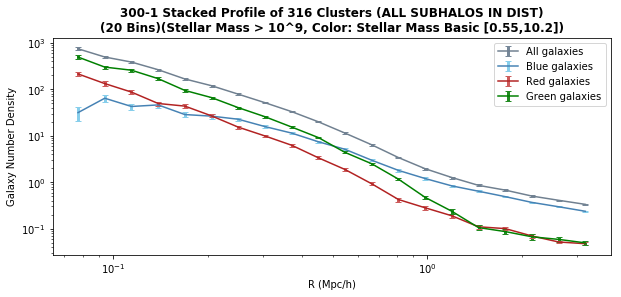

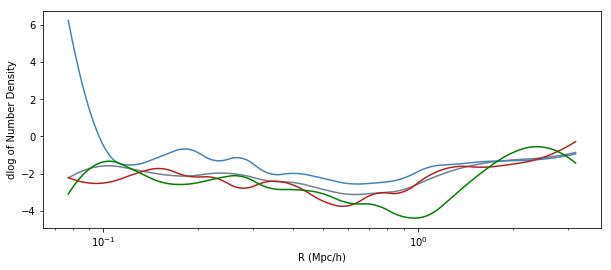

In [39]:
# Running Color Split Profiles

bin_stack1, Yi_avg1, cov1, boot_err1, Yi_avg_blue1, cov_blue1, boot_err_blue1, Yi_avg_red1, cov_red1, boot_err_red1, Yi_avg_green1, cov_green1, boot_err_green1, red1_ratio1, red2_ratio1, number_red11, number_red21, red1_submass, red2_submass, R_avg1, color_title1  = ColorProfiles(halo_array_masked,'basic','stellarmass')


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


rho_g= 0.027543187127290668
Time: 764.4967350959778


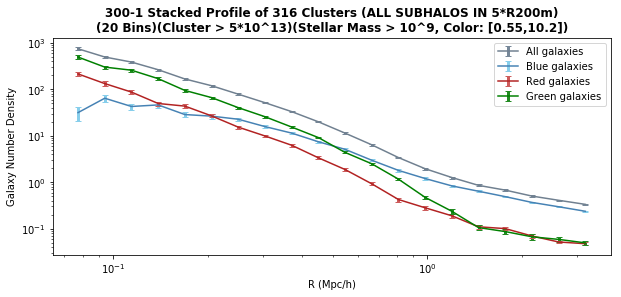

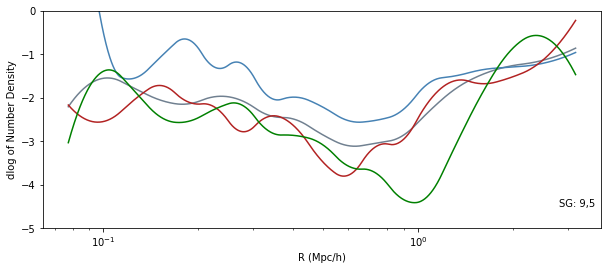

In [41]:
# REPLOTTING COLOR SPLIT PROFILES
Nsubs = len(subhalo_table[np.log10(subhalo_table['StellarMass']*1e10)>=9])
rho_g = Nsubs/(boxsize*.001)**3
print('rho_g=',rho_g)
# REPLOTTING AND ADJUSTING (NEW ALL SUBS/TABLE)

w = 9#9
p = 5#5
'''
# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg1, cov1, boot_err1 = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue1, cov_blue1, boot_err_blue1 = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red1, cov_red1, boot_err_red1 = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green1, cov_green1, boot_err_green1 = Bootstrap_Covariance(NDensity_list_g, 300, bins)

dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack1, (Yi_avg1), 1000,w,p)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack1, (Yi_avg_blue1), 1000,w,p)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack1, (Yi_avg_red1), 1000,w,p)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack1, (Yi_avg_green1), 1000,w,p)  
'''
print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack1, Yi_avg_blue1, yerr = boot_err_blue1, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack1, Yi_avg_red1, yerr = boot_err_red1, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack1, Yi_avg_green1, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')

#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN %s*R200m)\n (%s Bins)(Cluster > 5*10^13)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, Halo_Rmax, bins, M,color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(2.8,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)
plt.show()


Running burn-in...


  0%|          | 0/5000 [00:00<?, ?it/s]

Running production...


100%|██████████| 5000/5000 [01:32<00:00, 54.29it/s]


Running burn-in...


  0%|          | 5/5000 [00:00<01:42, 48.59it/s]

Running production...


100%|██████████| 5000/5000 [01:21<00:00, 61.48it/s]


Running burn-in...


  0%|          | 6/5000 [00:00<01:33, 53.26it/s]

Running production...


100%|██████████| 5000/5000 [01:23<00:00, 59.60it/s]


Running burn-in...


  0%|          | 0/5000 [00:00<?, ?it/s]

Running production...


100%|██████████| 5000/5000 [01:24<00:00, 59.44it/s]


done MCMC 1079.9218831062317


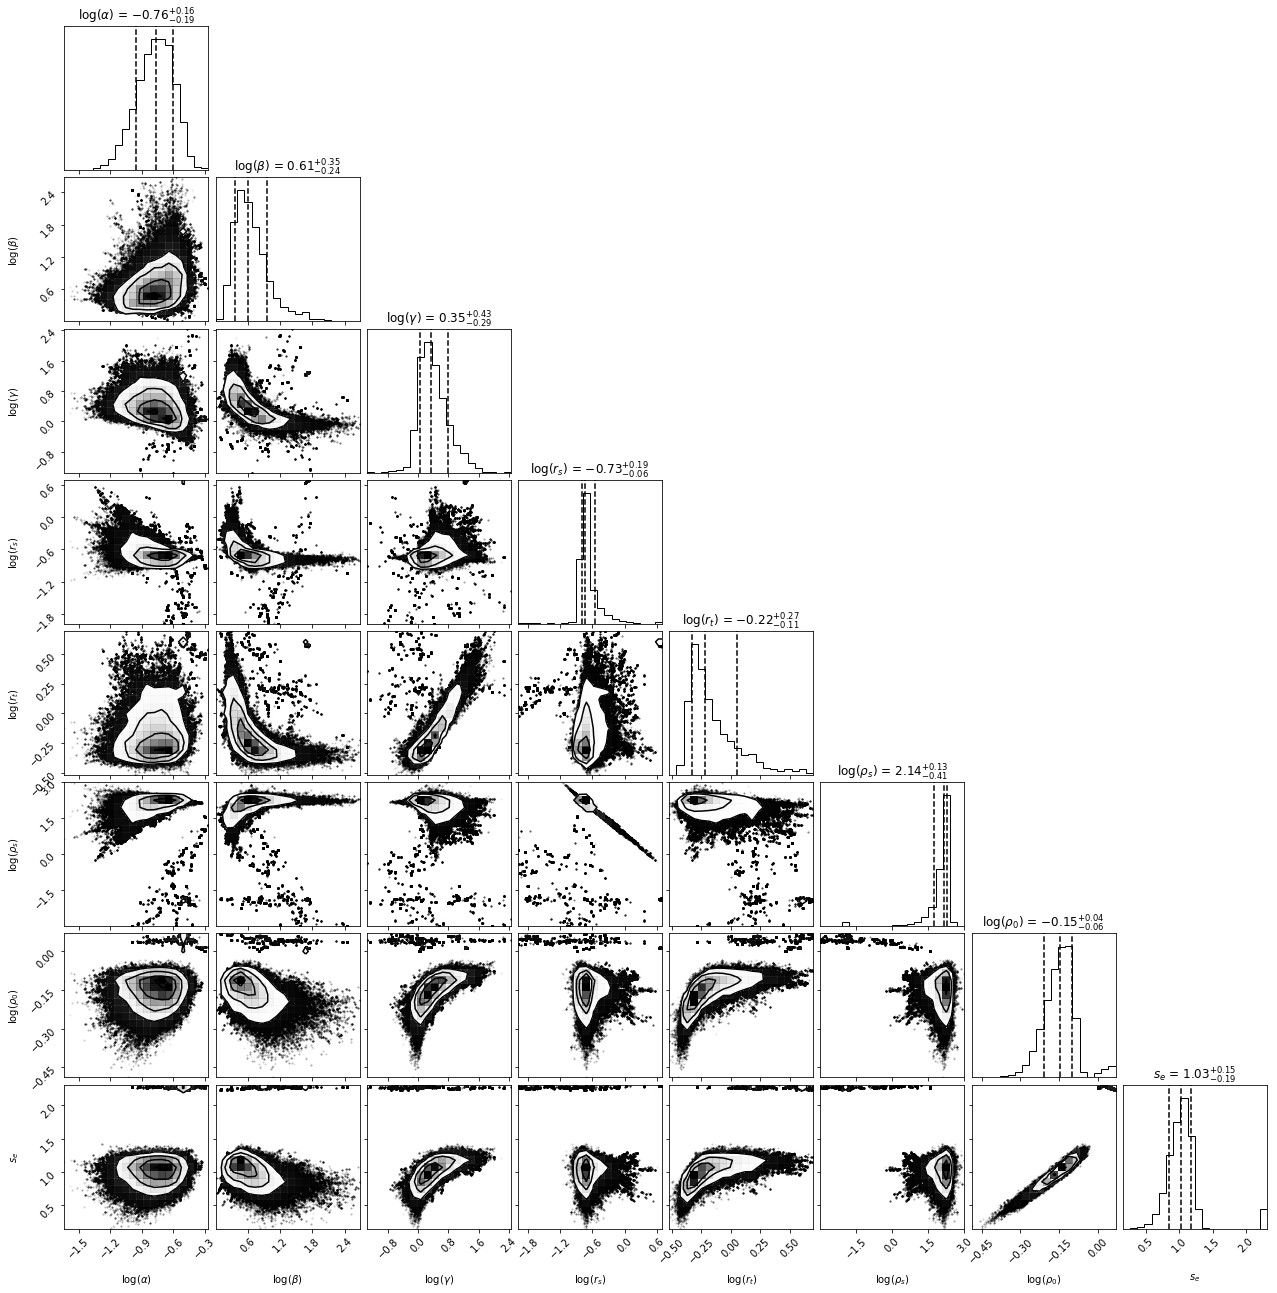

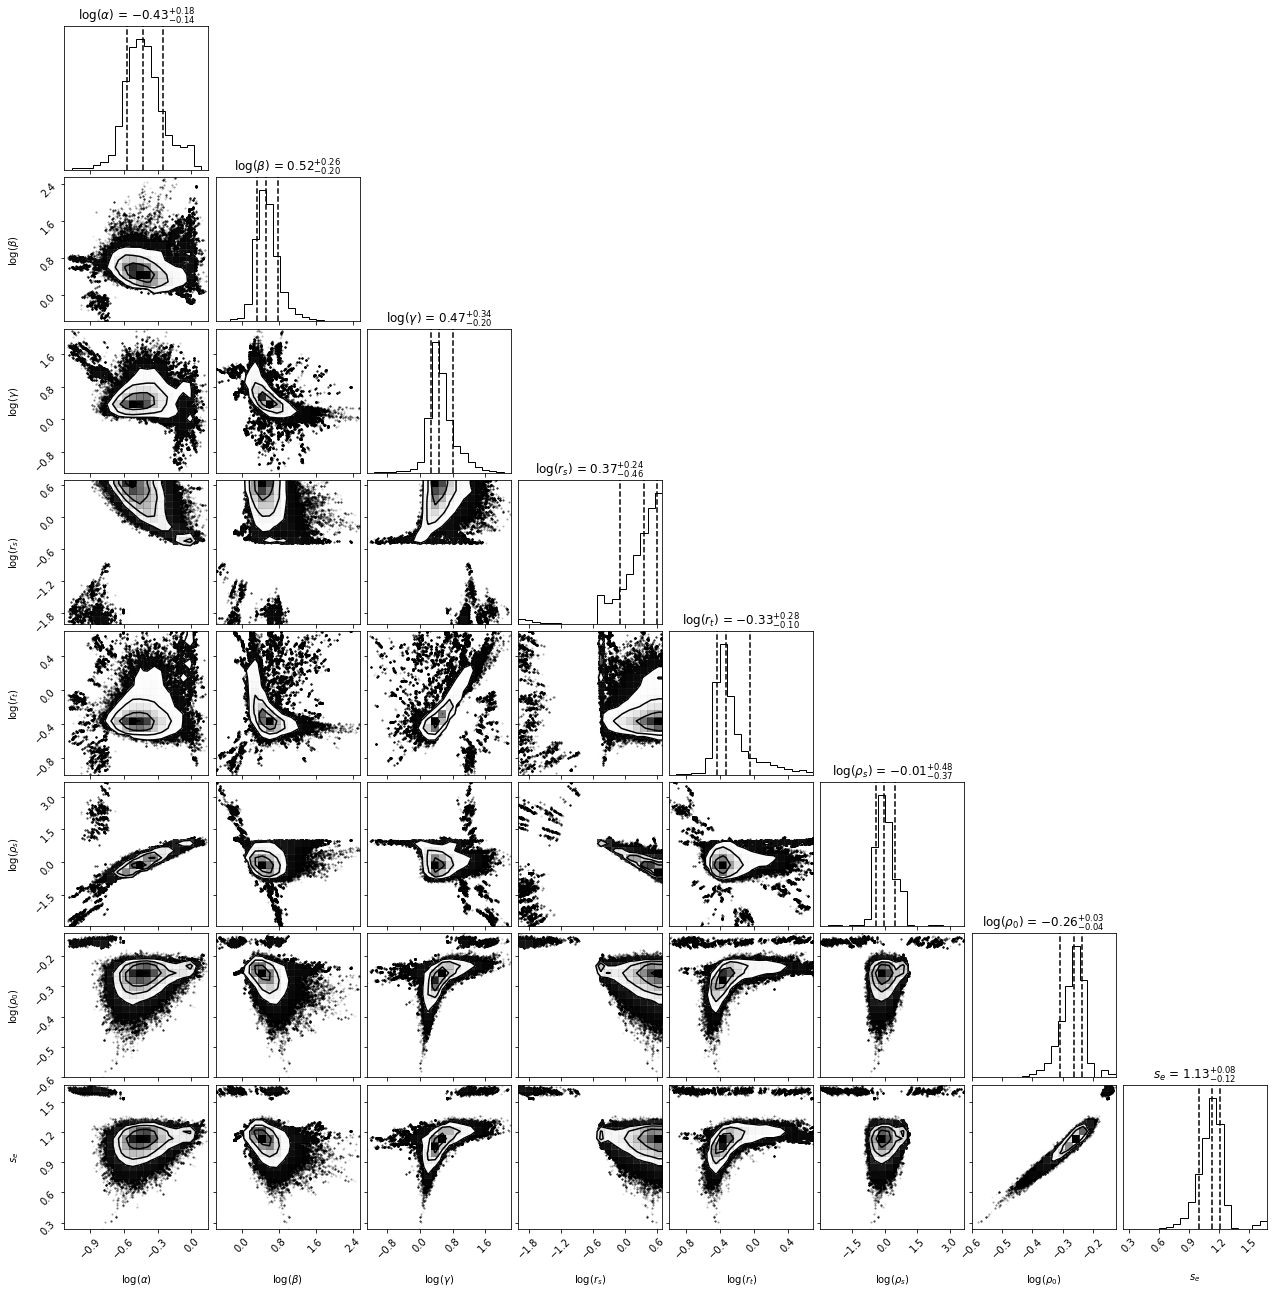

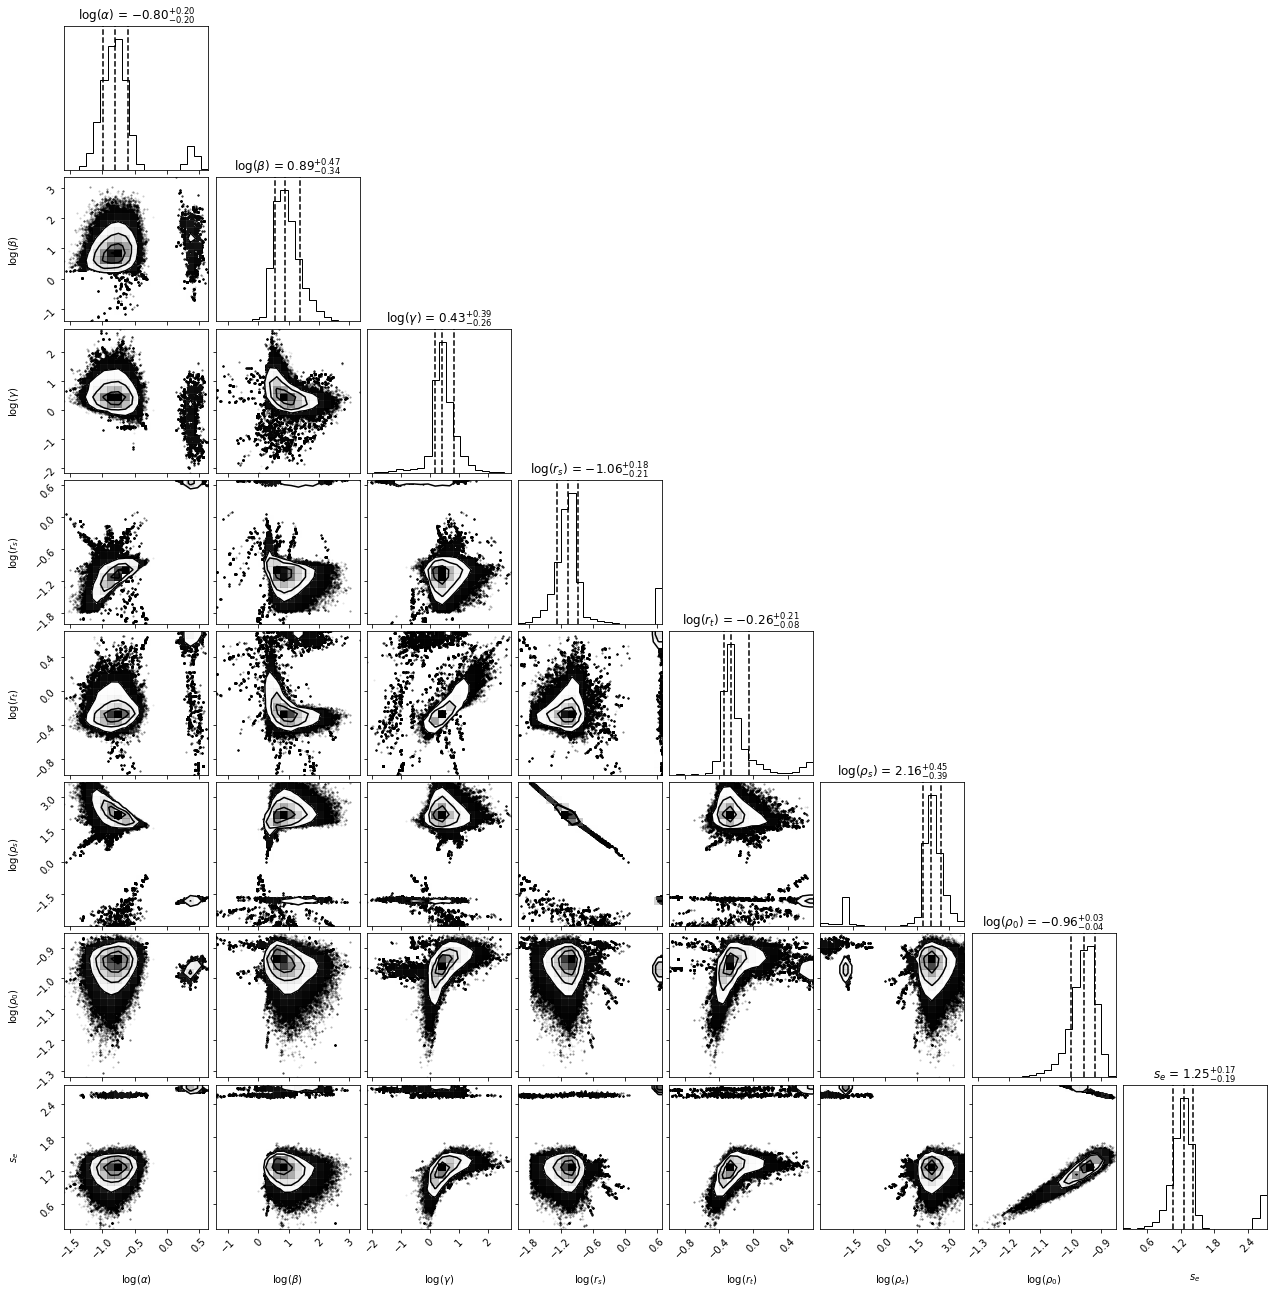

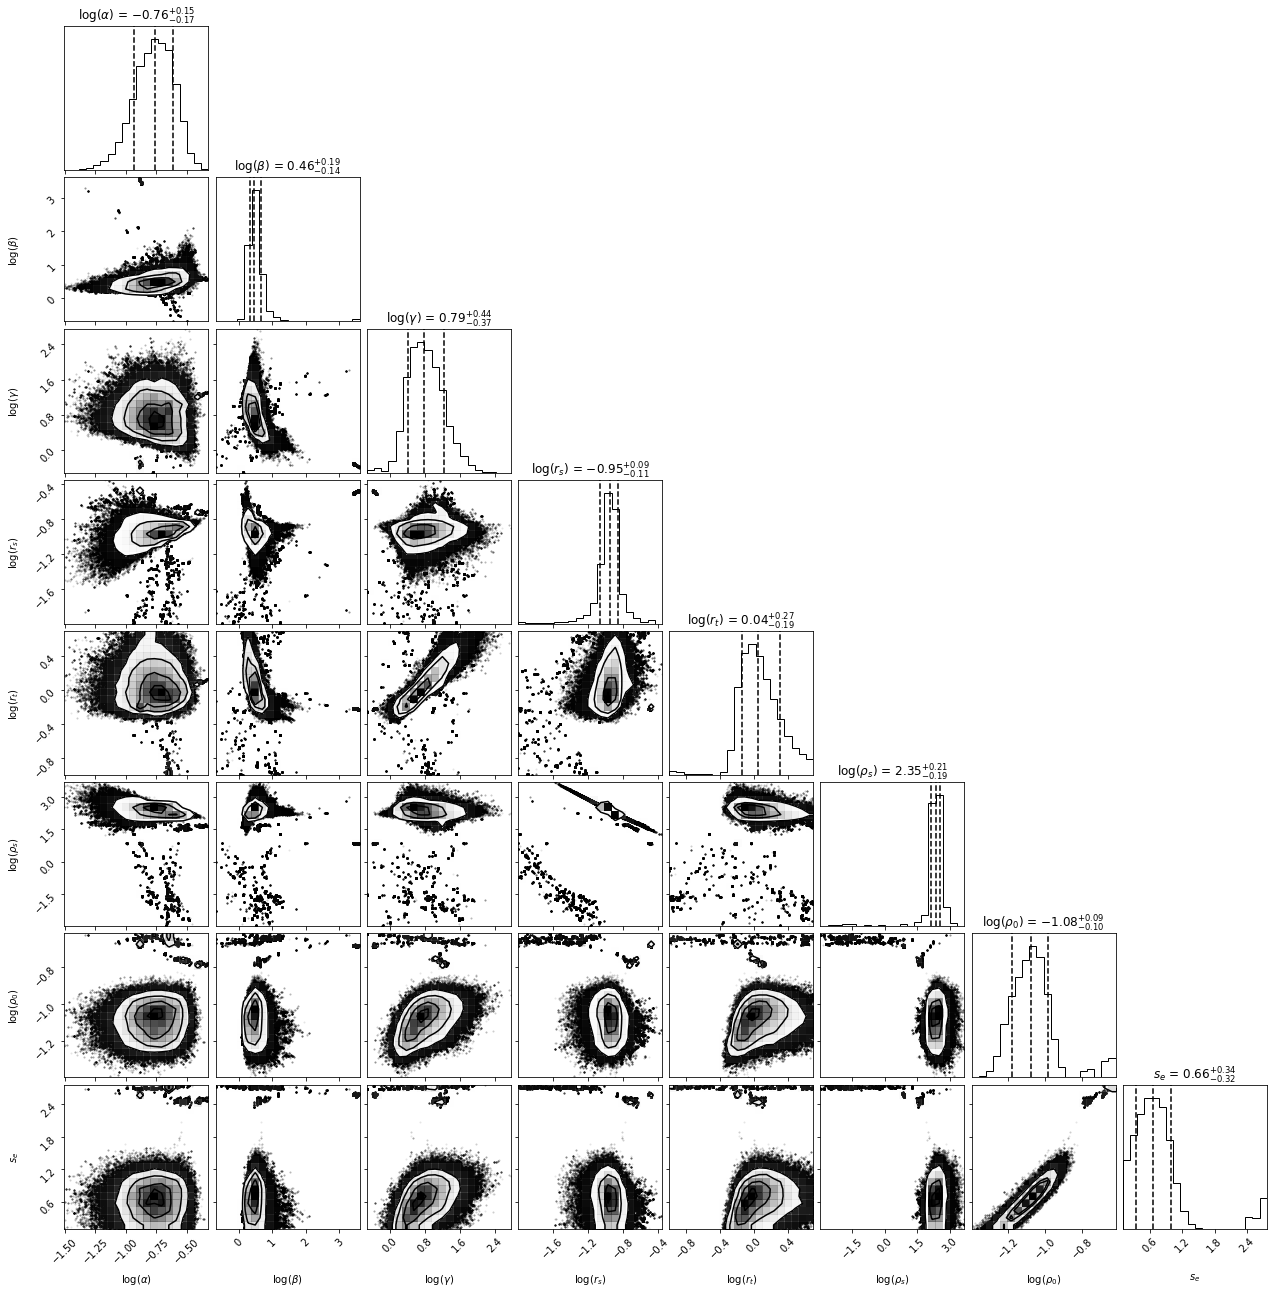

In [101]:
t0 = time.time()
import corner
labels = [r'$\log(\alpha)$', r'$\log(\beta)$', r'$\log(\gamma)$', r'$\log(r_s)$', r'$\log(r_t)$', r'$\log(\rho_s)$', r'$\log(\rho_0)$', r'$s_e$']
profiles = [Yi_avg1, Yi_avg_blue1, Yi_avg_red1,Yi_avg_green1]
covs = [cov1, cov_blue1, cov_red1,cov_green1]
#best_fit_mcmc = 0
#best_fit_mcmc_blue = 0
#best_fit_mcmc_red = 0
#best_fit_mcmc_green = 0
best_fit_mcmc_list = []#[best_fit_mcmc, best_fit_mcmc_blue, best_fit_mcmc_red, best_fit_mcmc_green]
samples_list = []
for i in range(len(profiles)):
    averaged_r_tot = bin_stack1 #in Mpc/h
    averaged_rho_tot = profiles[i]#Yi_avg1
    cov = covs[i]
    
    # Fit TNG_300-1 Profiles
    data = [averaged_r_tot, averaged_rho_tot, cov]
    args = (averaged_r_tot, averaged_rho_tot, cov)
    # Set initial guess and boundaries and use minimization to determine start position of MCMC chain
    #lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
    #init_theta = np.array([-0.50257944, 0.58536, 0.90564052,  -0.5, 0.35784823, 13.8549328, 8.051313892 , 1.30773031])
    #init_theta = np.array([-.92, 0.78, 0.60, -0.61, 0.34, 2.7, -.3 , 1.66])
    init_theta = np.array([-.92, 0.78, 0.60, -0.61, 0.34, 2, 3 , 1.66])


    bounds = ((-2, 2),(-1.4, 3), (-1.2,3), (-2, 0.7), (-2, 0.7), (-1, 30), (-1, 30), (.1, 10)) 
    ndim = 8 #number of free parameters
    neg_ll3d = lambda *args: -ln_like3d(*args)

    res = scipy.optimize.minimize(neg_ll3d, init_theta, args=args, method='SLSQP', options = {'maxiter':500}, bounds=bounds)

    # Run MCMC
    n_burn = 10000#500?? or 1000
    n_dim, n_walkers = 8, 128#128 #increasing walkers from 500 to 1000 seemed to help, maybe return n_iter and n_burn to lower values
    n_iter = 5000#5000
    # WORKED with 5000,8,200,10000. pretty good with 1000 for burn. 
    # BEST is 10000,8,128,5000 takes 280 seconds for main part 
    p0 = [res.x + 1e-3*np.random.randn(n_dim) for i in range(n_walkers)]
    sampler, pos, prob, state = main(p0, n_walkers, n_iter, n_dim, ln_prob3d, data)
    samples = sampler.flatchain
    corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84], show_titles=True);
    samples_list.append(samples)
    best_fit_mcmc_list.append(samples[np.argmax(sampler.flatlnprobability)])


print('done MCMC',time.time()-t0)

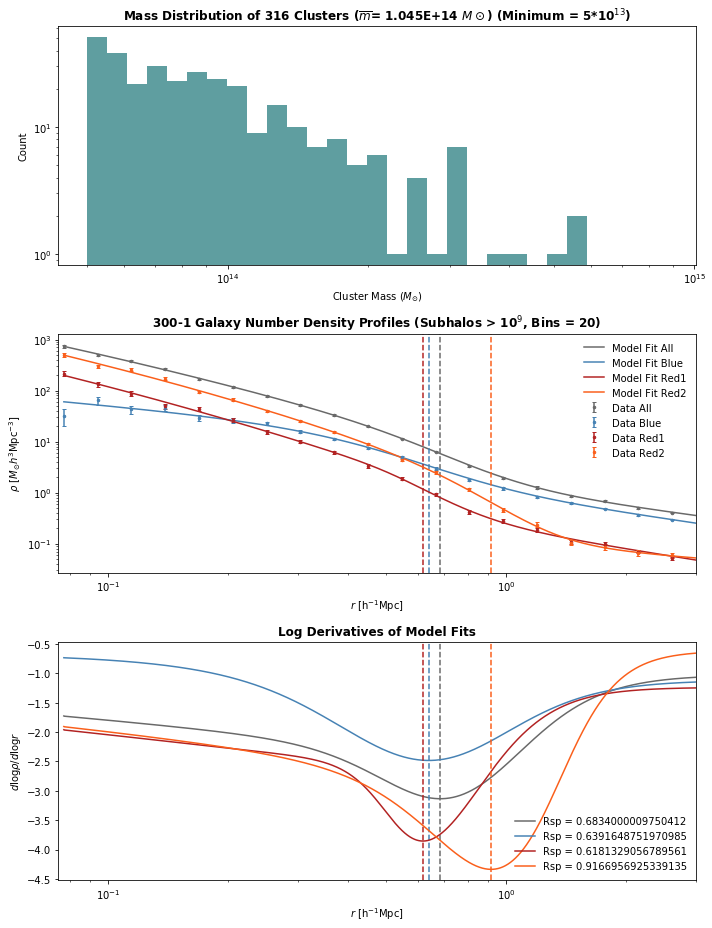

In [158]:
# MCMC FITTING COLOR SPLIT PROFILES
colors = ['dimgray','steelblue','firebrick','#fa5f1b']
labels = ['All','Blue','Red1','Red2']
profiles = [Yi_avg1, Yi_avg_blue1, Yi_avg_red1,Yi_avg_green1]
covs = [cov1, cov_blue1, cov_red1,cov_green1]

plt.figure(figsize=(10,13))#(20,28))
ax0 = plt.subplot(3,1,1)
ax1 = plt.subplot(3,1,2)
ax2 = plt.subplot(3,1,3)
plt.tight_layout()
halo_masses = []
for h_i in halo_array_masked:
    halo_masses.append(halo_grp['GroupMass'][h_i]*1e10)


for i in range(len(colors)):
    best_fit_mcmc = best_fit_mcmc_list[i]
    averaged_rho_tot = profiles[i]
    r_thr = np.logspace(np.log10(np.min(averaged_r_tot)), np.log10(np.max(averaged_r_tot)), 3000)
    
    log_deriv_mcmc = r_thr/rho_DK14(best_fit_mcmc,r_thr)*np.gradient(rho_DK14(best_fit_mcmc,r_thr), r_thr)

    r_sp = r_thr[np.argmin(log_deriv_mcmc)]
    #plt.subplot(3,1,1)
    
    bins0 = np.logspace(np.min(np.log10(halo_masses)), 
                       np.max(np.log10(halo_masses)), 30)

    ax0.hist(halo_masses, bins=bins0, color = 'cadetblue')
    title_str = r"Mass Distribution of %s Clusters ($\overline{m}$= " % (Number_of_halos)
    title_str += ("{:.3E} $M\odot$)").format(np.mean(halo_masses))
    ax0.set_title(title_str+' (Minimum = 5*10$^{13}$)', fontweight="bold")
    ax0.set_xlabel(r"Cluster Mass ($M_{\odot}$)")
    ax0.set_ylabel("Count")
    ax0.set_xscale("log")
    ax0.set_yscale("log")

    #plt.subplot(3,1,2)
    mult1 = 1 #r_thr
    mult2 = 1 #averaged_r_tot
    ax1.plot(r_thr, mult1*rho_DK14(best_fit_mcmc, r_thr), color=colors[i], linestyle="-" 
             , label="Model Fit %s" %(labels[i]))
    ax1.errorbar(averaged_r_tot, mult2*averaged_rho_tot, 
                 yerr=np.sqrt(np.diag(covs[i])), 
                 marker = '.', color = colors[i], linestyle = "none",
                 markersize = 5, ecolor = colors[i], elinewidth = 1.5, capsize=2, 
                 markeredgewidth=1, label="Data %s" %(labels[i]))
    #ax1.plot(r_thr,r_thr)
    #ax1.plot(averaged_r_tot,averaged_r_tot,'--')

    #plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategray', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    ax1.axvline(r_sp, linestyle="--", color=colors[i])
    ax1.legend(frameon=False, loc="upper right")
    ax1.set_title("300-1 Galaxy Number Density Profiles (Subhalos > 10$^{%s}$, Bins = %s)" %(M,bins), fontweight="bold")
    ax1.set_xlabel(r"$r$ [h$^{-1}$Mpc]")
    ax1.set_ylabel(r"$\rho$ [$M_{\odot}h^3$Mpc$^{-3}$]")
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlim(0.075, 3) #2


    #plt.subplot(3,1,3)
    ax2.plot(r_thr, log_deriv_mcmc, label='Rsp = %s' %(r_sp), color=colors[i])
    ax2.axvline(r_sp, linestyle="--", color=colors[i])
    ax2.set_xscale("log")
    ax2.set_title("Log Derivatives of Model Fits", fontweight="bold", color="k")
    ax2.set_xlabel(r"$r$ [h$^{-1}$Mpc]")
    ax2.set_ylabel(r"$d\log \rho / d \log r$")
    ax2.set_xlim(0.075, 3)#2
    ax2.legend(frameon=False, loc="lower right")

plt.tight_layout()
plt.show()



## Dynamical Friction Test


Halo: 0
Halo Mass: 87453.625
N Subhalos from Illustris Algorithm: 5464 0.0008039474487304688
R500c, R200c, R200m: 0.7612624597816122 1.24644093717065 1.5473688588641492
Rscale 1.5473688588641492
before dev loop: 0.01069188117980957
232118 232118 time 0.04132986068725586
N Subhalos within 5*R200m: 1175 0.08653688430786133
galaxies [4, 8, 14, 20, 16, 27, 32, 21, 25, 59, 52, 35, 29, 32, 19, 39, 70, 122, 290, 243]
blue galaxies counted [0, 0, 0, 2, 1, 4, 3, 5, 3, 6, 6, 9, 4, 18, 15, 32, 40, 67, 96, 155]
red galaxies counted [1, 1, 7, 4, 3, 3, 8, 4, 8, 18, 15, 14, 14, 7, 3, 5, 11, 24, 61, 39]
red galaxies counted [3, 7, 7, 14, 12, 20, 21, 12, 14, 35, 31, 12, 11, 7, 1, 2, 19, 31, 133, 49]
sum of galaxies: 1157

Halo: 1
Halo Mass: 57760.027
N Subhalos from Illustris Algorithm: 3959 0.09092593193054199
R500c, R200c, R200m: 0.5860514830407864 0.916949635434108 1.1697442162737657
Rscale 1.1697442162737657
before dev loop: 0.10013580322265625
232118 232118 time 0.1158609390258789
N Subhalos with

N Subhalos within 5*R200m: 250 0.638150691986084
galaxies [4, 1, 2, 6, 7, 7, 7, 14, 19, 9, 13, 20, 7, 2, 5, 10, 5, 19, 50, 37]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 4, 5, 2, 2, 6, 1, 2, 5, 9, 5, 12, 24, 34]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 4, 3, 2, 4, 3, 2, 0, 0, 1, 0, 2, 6, 3]
red galaxies counted [4, 1, 2, 6, 6, 5, 5, 6, 11, 5, 7, 11, 4, 0, 0, 0, 0, 5, 20, 0]
sum of galaxies: 244

Halo: 13
Halo Mass: 27343.611
N Subhalos from Illustris Algorithm: 1930 0.6447868347167969
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
Rscale 0.9043717716298794
before dev loop: 0.650566816329956
232118 232118 time 0.6680569648742676
N Subhalos within 5*R200m: 280 0.6854887008666992
galaxies [1, 3, 2, 4, 5, 6, 14, 6, 12, 9, 11, 7, 9, 22, 19, 14, 21, 30, 28, 48]
blue galaxies counted [0, 1, 0, 0, 3, 2, 3, 3, 7, 5, 6, 3, 4, 5, 9, 10, 19, 25, 23, 43]
red galaxies counted [0, 0, 0, 2, 1, 1, 2, 1, 3, 1, 2, 0, 2, 4, 3, 2, 1, 5, 5, 4]
red galaxies counted [1, 2, 2, 

232118 232118 time 1.2772908210754395
N Subhalos within 5*R200m: 158 1.2947518825531006
galaxies [1, 3, 1, 2, 4, 2, 6, 8, 6, 18, 16, 9, 9, 2, 6, 7, 7, 15, 13, 18]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 1, 2, 5, 2, 4, 0, 4, 7, 7, 10, 13, 17]
red galaxies counted [0, 1, 0, 0, 0, 1, 2, 1, 3, 4, 2, 2, 3, 1, 2, 0, 0, 4, 0, 1]
red galaxies counted [1, 2, 1, 2, 4, 0, 3, 4, 2, 12, 9, 5, 2, 1, 0, 0, 0, 1, 0, 0]
sum of galaxies: 153

Halo: 29
Halo Mass: 18336.77
N Subhalos from Illustris Algorithm: 1211 1.2964930534362793
R500c, R200c, R200m: 0.37254839425574054 0.582633141407676 0.7267309038611021
Rscale 0.7267309038611021
before dev loop: 1.301405906677246
232118 232118 time 1.328613042831421
N Subhalos within 5*R200m: 212 1.3605008125305176
galaxies [0, 2, 2, 3, 0, 3, 2, 2, 7, 4, 6, 4, 3, 9, 17, 32, 15, 17, 24, 56]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 5, 6, 8, 7, 14, 17, 26]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 3, 1, 1, 8, 2, 2, 5, 12]
red

232118 232118 time 1.9025919437408447
N Subhalos within 5*R200m: 227 1.9233338832855225
galaxies [5, 2, 1, 1, 5, 4, 7, 7, 6, 2, 11, 12, 7, 4, 17, 21, 23, 16, 29, 40]
blue galaxies counted [0, 0, 0, 0, 0, 1, 3, 4, 1, 0, 2, 2, 4, 3, 10, 14, 17, 15, 23, 34]
red galaxies counted [0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 5, 2, 0, 0, 4, 1, 5, 1, 5, 3]
red galaxies counted [5, 1, 1, 1, 4, 2, 3, 2, 4, 0, 4, 8, 3, 1, 3, 6, 1, 0, 1, 3]
sum of galaxies: 220

Halo: 43
Halo Mass: 15200.831
N Subhalos from Illustris Algorithm: 1214 1.9251549243927002
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
Rscale 0.8754398344272135
before dev loop: 1.9305379390716553
232118 232118 time 1.9538118839263916
N Subhalos within 5*R200m: 298 1.9729430675506592
galaxies [1, 0, 3, 3, 5, 14, 9, 9, 6, 7, 12, 9, 5, 3, 2, 9, 17, 38, 66, 73]
blue galaxies counted [0, 0, 2, 0, 0, 2, 3, 0, 1, 2, 5, 5, 3, 3, 2, 9, 13, 13, 39, 50]
red galaxies counted [0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 4, 1, 1, 0, 0, 0, 2, 2, 8,

before dev loop: 2.534108877182007
232118 232118 time 2.5532829761505127
N Subhalos within 5*R200m: 158 2.5725998878479004
galaxies [1, 3, 5, 3, 5, 7, 5, 9, 5, 5, 11, 7, 5, 2, 3, 15, 17, 8, 21, 18]
blue galaxies counted [0, 0, 1, 0, 1, 3, 1, 3, 3, 2, 1, 0, 2, 2, 3, 7, 12, 7, 20, 17]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 3, 2, 0, 0, 2, 3, 1, 1, 1]
red galaxies counted [1, 3, 4, 3, 3, 4, 4, 5, 2, 1, 9, 4, 1, 0, 0, 6, 2, 0, 0, 0]
sum of galaxies: 155

Halo: 57
Halo Mass: 12960.73
N Subhalos from Illustris Algorithm: 877 2.576213836669922
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
Rscale 0.7824358003711316
before dev loop: 2.5795559883117676
232118 232118 time 2.598351001739502
N Subhalos within 5*R200m: 145 2.6143338680267334
galaxies [2, 3, 5, 4, 1, 2, 4, 11, 4, 4, 6, 4, 11, 5, 8, 16, 6, 13, 9, 21]
blue galaxies counted [0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 4, 2, 7, 11, 5, 11, 7, 19]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3,

N Subhalos within 5*R200m: 175 3.1643989086151123
galaxies [1, 2, 2, 0, 2, 6, 6, 8, 2, 11, 6, 5, 2, 6, 5, 9, 3, 17, 27, 53]
blue galaxies counted [0, 1, 1, 0, 0, 3, 0, 4, 0, 2, 1, 2, 1, 1, 5, 9, 3, 14, 16, 44]
red galaxies counted [1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 5]
red galaxies counted [0, 1, 1, 0, 2, 2, 3, 2, 2, 9, 4, 3, 1, 3, 0, 0, 0, 2, 9, 4]
sum of galaxies: 173

Halo: 72
Halo Mass: 11179.371
N Subhalos from Illustris Algorithm: 744 3.17641282081604
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
Rscale 0.7958097092070726
before dev loop: 3.1804111003875732
232118 232118 time 3.2052669525146484
N Subhalos within 5*R200m: 134 3.2284228801727295
galaxies [3, 1, 2, 4, 2, 2, 3, 4, 10, 4, 5, 2, 4, 4, 3, 1, 9, 7, 30, 30]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 3, 2, 1, 0, 1, 0, 3, 1, 8, 7, 24, 25]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 6, 3]
red galaxies counted [3, 1, 2, 3, 1, 2, 2, 4, 5

232118 232118 time 3.7941129207611084
N Subhalos within 5*R200m: 103 3.8112590312957764
galaxies [0, 0, 2, 1, 4, 4, 8, 5, 5, 8, 7, 6, 4, 1, 7, 5, 6, 6, 6, 12]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 2, 1, 3, 3, 4, 3, 1, 4, 4, 5, 5, 6, 8]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 3]
red galaxies counted [0, 0, 2, 1, 2, 3, 6, 2, 3, 3, 3, 1, 1, 0, 2, 0, 0, 1, 0, 1]
sum of galaxies: 97

Halo: 86
Halo Mass: 10534.838
N Subhalos from Illustris Algorithm: 704 3.8127968311309814
R500c, R200c, R200m: 0.3965638205848645 0.6349587699091653 0.7717709427927804
Rscale 0.7717709427927804
before dev loop: 3.816816806793213
232118 232118 time 3.8394107818603516
N Subhalos within 5*R200m: 100 3.8554279804229736
galaxies [0, 2, 1, 1, 5, 3, 3, 9, 4, 3, 5, 2, 1, 2, 0, 2, 9, 12, 16, 17]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 3, 1, 0, 2, 0, 1, 7, 10, 7, 12]
red galaxies counted [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 4]
red galaxies cou

232118 232118 time 4.456578016281128
N Subhalos within 5*R200m: 88 4.473168849945068
galaxies [1, 1, 1, 0, 1, 2, 4, 2, 2, 4, 5, 2, 5, 9, 10, 4, 6, 2, 13, 11]
blue galaxies counted [0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 2, 1, 3, 6, 6, 4, 6, 2, 13, 9]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2]
red galaxies counted [1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 102
Halo Mass: 9930.823
N Subhalos from Illustris Algorithm: 783 4.476935863494873
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
Rscale 0.700963930248612
before dev loop: 4.481606721878052
232118 232118 time 4.49894380569458
N Subhalos within 5*R200m: 128 4.515195846557617
galaxies [1, 1, 1, 2, 2, 8, 3, 2, 3, 4, 1, 2, 4, 7, 8, 8, 22, 5, 8, 31]
blue galaxies counted [1, 1, 0, 0, 0, 5, 2, 2, 2, 2, 1, 2, 2, 6, 5, 7, 11, 4, 8, 26]
red galaxies counted [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 6, 1, 0, 3]
red galaxies counted [0

232118 232118 time 5.084887981414795
N Subhalos within 5*R200m: 111 5.1063008308410645
galaxies [1, 0, 1, 1, 4, 2, 3, 4, 4, 4, 4, 4, 6, 4, 16, 2, 6, 10, 15, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 3, 2, 5, 10, 13, 14]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2]
red galaxies counted [1, 0, 1, 1, 3, 1, 2, 3, 3, 2, 1, 3, 3, 3, 12, 0, 1, 0, 1, 1]
sum of galaxies: 108

Halo: 115
Halo Mass: 9228.84
N Subhalos from Illustris Algorithm: 667 5.109006881713867
R500c, R200c, R200m: 0.3409618926838454 0.587031286204442 0.7343132688191691
Rscale 0.7343132688191691
before dev loop: 5.116147756576538
232118 232118 time 5.148009777069092
N Subhalos within 5*R200m: 114 5.175419092178345
galaxies [1, 1, 0, 2, 0, 4, 4, 6, 8, 5, 9, 7, 0, 1, 0, 5, 7, 10, 18, 23]
blue galaxies counted [1, 1, 0, 0, 0, 2, 0, 4, 1, 2, 3, 6, 0, 1, 0, 5, 5, 10, 16, 18]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 3, 1, 0, 0, 0, 0, 2, 0, 1, 3]
red galaxies 

232118 232118 time 5.724116802215576
N Subhalos within 5*R200m: 134 5.743573904037476
galaxies [0, 2, 0, 1, 4, 9, 5, 3, 5, 7, 6, 0, 1, 4, 2, 3, 4, 6, 15, 49]
blue galaxies counted [0, 1, 0, 0, 0, 1, 3, 0, 2, 2, 2, 0, 1, 4, 2, 3, 4, 6, 9, 19]
red galaxies counted [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 12]
red galaxies counted [0, 1, 0, 1, 3, 6, 2, 3, 3, 4, 2, 0, 0, 0, 0, 0, 0, 0, 3, 18]
sum of galaxies: 126

Halo: 128
Halo Mass: 8926.37
N Subhalos from Illustris Algorithm: 792 5.745685815811157
R500c, R200c, R200m: 0.34657992724933545 0.5474611944025112 0.6935963100878747
Rscale 0.6935963100878747
before dev loop: 5.752166748046875
232118 232118 time 5.7833027839660645
N Subhalos within 5*R200m: 98 5.815753936767578
galaxies [2, 1, 0, 4, 5, 1, 1, 0, 5, 7, 4, 3, 3, 3, 4, 10, 14, 11, 8, 11]
blue galaxies counted [0, 0, 0, 2, 2, 0, 0, 0, 3, 4, 3, 1, 2, 3, 2, 5, 11, 11, 7, 7]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 3, 2, 0, 1, 3]
red galaxies co

232118 232118 time 6.356100082397461
N Subhalos within 5*R200m: 117 6.375488996505737
galaxies [1, 0, 3, 2, 1, 4, 3, 2, 6, 7, 5, 5, 3, 3, 3, 5, 7, 14, 23, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 3, 0, 2, 3, 5, 5, 12, 17, 14]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 5, 3, 1, 1, 1, 0, 0, 0, 2, 2, 6, 3]
red galaxies counted [1, 0, 3, 2, 1, 3, 1, 0, 1, 1, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 114

Halo: 141
Halo Mass: 8617.786
N Subhalos from Illustris Algorithm: 608 6.377269983291626
R500c, R200c, R200m: 0.3631599951259469 0.5389215256424773 0.665320577578168
Rscale 0.665320577578168
before dev loop: 6.382863998413086
232118 232118 time 6.413193941116333
N Subhalos within 5*R200m: 74 6.432622909545898
galaxies [2, 0, 1, 1, 2, 1, 4, 1, 1, 2, 5, 3, 4, 4, 9, 11, 4, 2, 7, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 4, 2, 2, 2, 1, 8, 2, 1, 7, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 3, 1, 1, 0, 1]
red galaxies counted [

N Subhalos within 5*R200m: 92 7.219480037689209
galaxies [0, 0, 2, 0, 2, 0, 2, 1, 6, 4, 5, 9, 9, 3, 5, 3, 1, 9, 9, 18]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 7, 1, 4, 2, 1, 6, 8, 16]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 0, 0, 3, 1, 1]
red galaxies counted [0, 0, 2, 0, 2, 0, 2, 1, 4, 0, 3, 3, 2, 2, 0, 1, 0, 0, 0, 1]
sum of galaxies: 88

Halo: 157
Halo Mass: 8041.41
N Subhalos from Illustris Algorithm: 639 7.223469972610474
R500c, R200c, R200m: 0.3406907793789391 0.5433642688181072 0.6748474558753672
Rscale 0.6748474558753672
before dev loop: 7.229549884796143
232118 232118 time 7.2558488845825195
N Subhalos within 5*R200m: 83 7.279064893722534
galaxies [0, 0, 0, 1, 0, 2, 2, 2, 10, 4, 6, 3, 1, 2, 5, 0, 14, 7, 6, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 4, 2, 1, 0, 0, 2, 4, 0, 10, 7, 5, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 1]
red galaxies counted [0, 0, 0, 1, 0, 2, 1, 0, 5, 2, 4, 2, 1

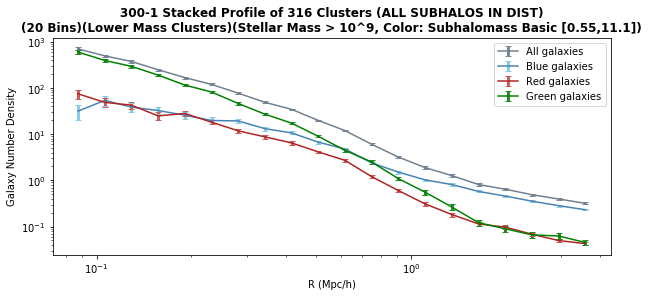

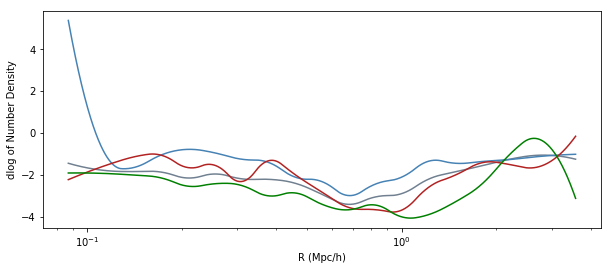


Halo: 158
Halo Mass: 8053.81
N Subhalos from Illustris Algorithm: 703 9.551904916763306
R500c, R200c, R200m: 0.3107090988260152 0.4755271720168756 0.593834300497032
Rscale 0.593834300497032
before dev loop: 9.560109853744507
232118 232118 time 9.576460838317871
N Subhalos within 5*R200m: 102 9.598712921142578
galaxies [0, 0, 0, 1, 2, 1, 2, 4, 2, 2, 2, 4, 5, 9, 8, 7, 10, 16, 12, 14]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 4, 5, 10, 7, 11, 10]
red galaxies counted [0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 3, 1, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 5, 4, 0, 0, 6, 0, 1]
sum of galaxies: 101

Halo: 159
Halo Mass: 8084.0312
N Subhalos from Illustris Algorithm: 588 9.600297927856445
R500c, R200c, R200m: 0.3891170523137019 0.5873126082944562 0.706823292487164
Rscale 0.706823292487164
before dev loop: 9.607870817184448
232118 232118 time 9.62433671951294
N Subhalos within 5*R200m: 89 9.642613887786865
galaxies [3, 0, 0, 1, 3, 0, 2, 

N Subhalos within 5*R200m: 87 10.420586824417114
galaxies [0, 3, 0, 1, 4, 4, 1, 3, 3, 0, 7, 5, 2, 1, 1, 0, 4, 7, 4, 30]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 1, 1, 0, 4, 6, 3, 21]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3]
red galaxies counted [0, 3, 0, 1, 4, 3, 1, 2, 2, 0, 4, 3, 1, 0, 0, 0, 0, 0, 1, 6]
sum of galaxies: 80

Halo: 172
Halo Mass: 7533.9155
N Subhalos from Illustris Algorithm: 665 10.423556089401245
R500c, R200c, R200m: 0.32497323374059606 0.5160921199361899 0.6534526847351336
Rscale 0.6534526847351336
before dev loop: 10.428632974624634
232118 232118 time 10.452699899673462
N Subhalos within 5*R200m: 83 10.478303909301758
galaxies [1, 0, 0, 0, 1, 2, 1, 4, 1, 4, 7, 3, 1, 6, 5, 6, 4, 8, 8, 19]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 5, 4, 6, 4, 5, 8, 18]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 3, 0, 1]
red galaxies counted [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 5, 

before dev loop: 11.250485897064209
232118 232118 time 11.269071102142334
N Subhalos within 5*R200m: 119 11.289402961730957
galaxies [0, 1, 2, 1, 3, 1, 3, 2, 5, 3, 5, 6, 4, 1, 2, 8, 13, 8, 18, 29]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 3, 1, 2, 6, 7, 6, 14, 23]
red galaxies counted [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 3, 0, 1, 0, 0, 1, 2, 1, 2, 4]
red galaxies counted [0, 0, 1, 1, 3, 1, 1, 1, 3, 1, 1, 5, 0, 0, 0, 1, 4, 1, 2, 2]
sum of galaxies: 115

Halo: 189
Halo Mass: 6939.0034
N Subhalos from Illustris Algorithm: 551 11.291930675506592
R500c, R200c, R200m: 0.3542306710504002 0.5429497120738211 0.6699731012791534
Rscale 0.6699731012791534
before dev loop: 11.296037673950195
232118 232118 time 11.312029838562012
N Subhalos within 5*R200m: 62 11.333768844604492
galaxies [2, 0, 2, 1, 1, 5, 1, 1, 3, 4, 6, 2, 0, 4, 3, 5, 2, 5, 2, 8]
blue galaxies counted [0, 0, 1, 1, 1, 2, 0, 1, 3, 1, 3, 2, 0, 3, 3, 3, 2, 3, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

N Subhalos within 5*R200m: 78 11.889877796173096
galaxies [0, 2, 0, 1, 0, 1, 2, 2, 2, 4, 0, 5, 2, 1, 6, 5, 8, 11, 18, 7]
blue galaxies counted [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 4, 2, 1, 5, 5, 4, 10, 16, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 4, 1, 2, 0]
red galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 77

Halo: 202
Halo Mass: 6825.4873
N Subhalos from Illustris Algorithm: 517 11.891612768173218
R500c, R200c, R200m: 0.35244809706719626 0.5348637537515462 0.6593945179435774
Rscale 0.6593945179435774
before dev loop: 11.897195816040039
232118 232118 time 11.91356086730957
N Subhalos within 5*R200m: 111 11.930497884750366
galaxies [1, 1, 3, 2, 1, 2, 9, 6, 5, 2, 3, 2, 2, 0, 2, 3, 10, 18, 18, 17]
blue galaxies counted [0, 0, 0, 0, 1, 0, 6, 3, 3, 1, 2, 1, 1, 0, 2, 3, 9, 16, 14, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 4, 4]
red galaxies counted [1, 1, 3, 2, 0, 2, 3, 3, 1,

N Subhalos within 5*R200m: 74 12.559767007827759
galaxies [0, 0, 1, 1, 1, 2, 1, 1, 4, 0, 3, 9, 3, 0, 2, 1, 8, 0, 6, 29]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 3, 0, 2, 1, 7, 0, 6, 18]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 4]
red galaxies counted [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 7]
sum of galaxies: 72

Halo: 216
Halo Mass: 6460.399
N Subhalos from Illustris Algorithm: 578 12.565465927124023
R500c, R200c, R200m: 0.3440694869051597 0.5176669151166083 0.6262987976226632
Rscale 0.6262987976226632
before dev loop: 12.573909997940063
232118 232118 time 12.591584920883179
N Subhalos within 5*R200m: 131 12.614552974700928
galaxies [1, 2, 1, 1, 1, 1, 2, 3, 6, 2, 2, 1, 3, 1, 4, 12, 5, 5, 16, 60]
blue galaxies counted [0, 0, 1, 0, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 2, 12, 5, 4, 11, 27]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 10]
red galaxies counted [0, 2, 0, 1, 0, 0, 1, 1, 2, 0,

232118 232118 time 13.193618774414062
N Subhalos within 5*R200m: 74 13.209872007369995
galaxies [1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 4, 6, 4, 1, 0, 2, 7, 1, 6, 27]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 1, 0, 1, 6, 1, 6, 20]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 3]
red galaxies counted [1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 4]
sum of galaxies: 70

Halo: 232
Halo Mass: 6047.211
N Subhalos from Illustris Algorithm: 410 13.211582899093628
R500c, R200c, R200m: 0.32095057206354594 0.48856094815369033 0.6087796416194736
Rscale 0.6087796416194736
before dev loop: 13.217130899429321
232118 232118 time 13.238619804382324
N Subhalos within 5*R200m: 91 13.254331827163696
galaxies [1, 0, 4, 0, 2, 3, 3, 2, 4, 2, 3, 5, 2, 8, 5, 4, 2, 6, 11, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 3, 2, 4, 11, 14]
red galaxies counted [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 0, 3]
red galaxies co

N Subhalos within 5*R200m: 89 13.821688890457153
galaxies [1, 3, 2, 1, 1, 2, 3, 3, 1, 1, 4, 2, 5, 2, 3, 3, 5, 17, 12, 16]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 3, 2, 5, 9, 10, 15]
red galaxies counted [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1]
red galaxies counted [1, 2, 2, 1, 1, 1, 2, 3, 1, 0, 1, 1, 2, 0, 0, 1, 0, 6, 1, 0]
sum of galaxies: 87

Halo: 248
Halo Mass: 5912.9204
N Subhalos from Illustris Algorithm: 502 13.823906898498535
R500c, R200c, R200m: 0.3020246254552539 0.4751767904981899 0.5955262364822579
Rscale 0.5955262364822579
before dev loop: 13.828912019729614
232118 232118 time 13.84635591506958
N Subhalos within 5*R200m: 70 13.8646719455719
galaxies [1, 1, 1, 2, 1, 1, 4, 2, 1, 1, 3, 1, 1, 1, 1, 3, 8, 6, 11, 16]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 5, 5, 9, 12]
red galaxies counted [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1]
red galaxies counted [0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 

N Subhalos within 5*R200m: 63 14.458300828933716
galaxies [0, 0, 0, 1, 3, 2, 2, 2, 6, 5, 4, 1, 3, 2, 5, 2, 1, 6, 4, 10]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 3, 2, 5, 2, 1, 4, 3, 10]
red galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0]
red galaxies counted [0, 0, 0, 1, 1, 0, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 59

Halo: 263
Halo Mass: 5607.6855
N Subhalos from Illustris Algorithm: 481 14.461817026138306
R500c, R200c, R200m: 0.3161559060428514 0.4853225613796399 0.6059943247319596
Rscale 0.6059943247319596
before dev loop: 14.467188835144043
232118 232118 time 14.486096858978271
N Subhalos within 5*R200m: 113 14.504796743392944
galaxies [0, 2, 0, 0, 2, 1, 2, 5, 5, 1, 3, 4, 3, 3, 3, 2, 4, 13, 14, 43]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 3, 0, 3, 2, 2, 3, 2, 2, 4, 10, 13, 26]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 8]
red galaxies counted [0, 1, 0, 0, 1, 1, 1, 2, 2, 1,

before dev loop: 15.283556938171387
232118 232118 time 15.312879085540771
N Subhalos within 5*R200m: 53 15.341072082519531
galaxies [1, 0, 1, 3, 1, 4, 2, 0, 1, 4, 3, 3, 5, 0, 2, 1, 3, 3, 2, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 3, 0, 2, 1, 2, 3, 2, 8]
red galaxies counted [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
red galaxies counted [1, 0, 1, 2, 1, 3, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 47

Halo: 279
Halo Mass: 5378.4937
N Subhalos from Illustris Algorithm: 429 15.342535734176636
R500c, R200c, R200m: 0.3139084920443983 0.4986738507505379 0.618305438986485
Rscale 0.618305438986485
before dev loop: 15.3521409034729
232118 232118 time 15.376860857009888
N Subhalos within 5*R200m: 67 15.403090953826904
galaxies [1, 2, 2, 0, 0, 2, 5, 1, 5, 4, 3, 1, 2, 0, 4, 3, 4, 12, 8, 7]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 3, 4, 10, 7, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 

232118 232118 time 15.926017999649048
N Subhalos within 5*R200m: 84 15.94262981414795
galaxies [0, 1, 1, 1, 0, 1, 1, 2, 2, 3, 3, 2, 4, 2, 2, 14, 7, 5, 7, 22]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 11, 5, 3, 7, 14]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 4]
red galaxies counted [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 4]
sum of galaxies: 80

Halo: 293
Halo Mass: 5212.3135
N Subhalos from Illustris Algorithm: 381 15.944373846054077
R500c, R200c, R200m: 0.3334798540609961 0.5058882991002044 0.6142056309215799
Rscale 0.6142056309215799
before dev loop: 15.949545860290527
232118 232118 time 15.966439723968506
N Subhalos within 5*R200m: 40 15.982946872711182
galaxies [0, 1, 1, 0, 1, 0, 3, 4, 4, 1, 1, 1, 0, 2, 0, 1, 0, 6, 4, 6]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 4, 1, 5]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
red galaxies counte

232118 232118 time 16.559480905532837
N Subhalos within 5*R200m: 87 16.57598090171814
galaxies [0, 0, 2, 0, 0, 4, 1, 2, 2, 4, 2, 1, 2, 2, 1, 2, 5, 4, 14, 35]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 5, 4, 12, 24]
red galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7]
red galaxies counted [0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 4]
sum of galaxies: 83

Halo: 310
Halo Mass: 5014.9004
N Subhalos from Illustris Algorithm: 357 16.578272819519043
R500c, R200c, R200m: 0.31482696242850344 0.4744959646176175 0.5871187214463078
Rscale 0.5871187214463078
before dev loop: 16.583345890045166
232118 232118 time 16.600214958190918
N Subhalos within 5*R200m: 49 16.618375778198242
galaxies [2, 0, 1, 0, 1, 2, 0, 1, 5, 1, 3, 2, 2, 1, 1, 0, 4, 4, 6, 9]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 4, 6, 7]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2]
red galaxies count

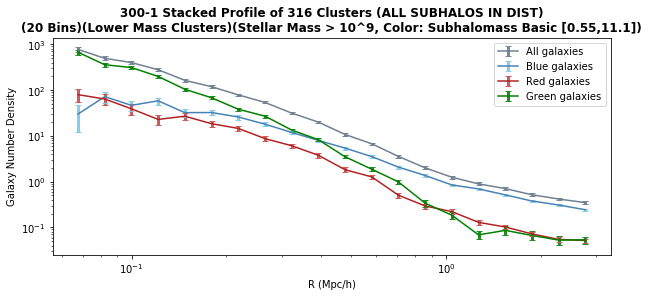

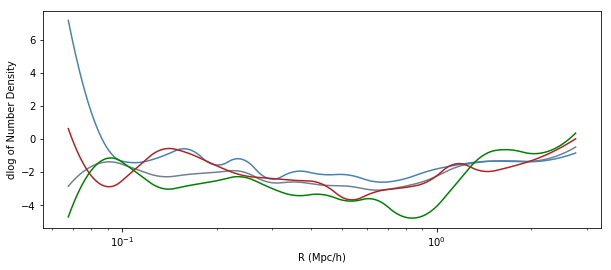

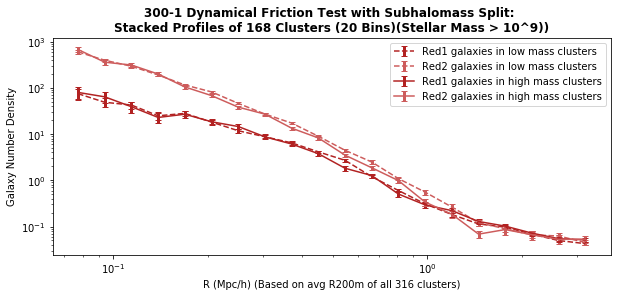

In [31]:
# TESTING FOR DYNAMICAL FRICTION:
'''
halo_array1=halo_array_masked[:int(len(halo_array_masked)/2)]
halo_array2=halo_array_masked[int(len(halo_array_masked)/2):]
plt.plot(halo_array1,np.log10(halo_grp['GroupMass'][halo_array1]))
plt.plot(halo_array2,np.log10(halo_grp['GroupMass'][halo_array2]))
print(halo_grp['GroupMass'][int(len(halo_array_masked)/2)])
print(len(NDensity_list_g1), len(NDensity_list_g2))
'''
t0 = time.time()


halo_array1=halo_array_masked[:int(len(halo_array_masked)/2)]
halo_array2=halo_array_masked[int(len(halo_array_masked)/2):]
#print(halo_array1,halo_array2)

bin_stackDF, Yi_avgDF, covDF, boot_errDF, Yi_avg_blueDF, cov_blueDF, boot_err_blueDF, Yi_avg_redDF, cov_redDF, boot_err_redDF, Yi_avg_greenDF, cov_greenDF, boot_err_greenDF, red1_ratioDF, red2_ratioDF, number_red1DF, number_red2DF, red1_submass, red2_submass, R_avgDF, color_titleDF  = ColorProfiles(halo_array1,'basic','subhalomass')

bin_stackDF2, Yi_avgDF2, covDF2, boot_errDF2, Yi_avg_blueDF2, cov_blueDF2, boot_err_blueDF2, Yi_avg_redDF2, cov_redDF2, boot_err_redDF2, Yi_avg_greenDF2, cov_greenDF2, boot_err_greenDF2, red1_ratioDF2, red2_ratioDF2, number_red1DF2, number_red2DF2, red1_submass2, red2_submass2, R_avgDF2, color_titleDF2  = ColorProfiles(halo_array2,'basic','subhalomass')
R_AVG = (R_avgDF+R_avgDF2)/2


# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar((R_AVG/R_avgDF)*bin_stackDF, Yi_avg_redDF, yerr = boot_err_redDF, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')
plt.errorbar((R_AVG/R_avgDF)*bin_stackDF, Yi_avg_greenDF, yerr = boot_err_greenDF, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')
plt.errorbar((R_AVG/R_avgDF2)*bin_stackDF2, Yi_avg_redDF2, yerr = boot_err_redDF2, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')
plt.errorbar((R_AVG/R_avgDF2)*bin_stackDF2, Yi_avg_greenDF2, yerr = boot_err_greenDF2, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h) (Based on avg R200m of all 316 clusters)')#('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Dynamical Friction Test with Subhalomass Split: \nStacked Profiles of 168 Clusters (%s Bins)(Stellar Mass > 10^%s))' %(bins, M), fontweight = 'bold', wrap=True)
plt.legend()


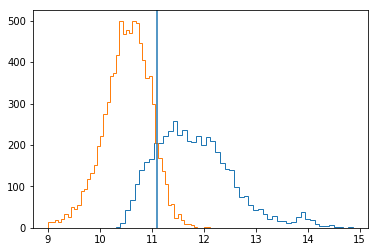

In [18]:
plt.figure()
plt.hist(np.log10(red1_submass),bins=50, histtype='step')
plt.hist(np.log10(red2_submass),bins=50, histtype='step')
plt.axvline(11.1)


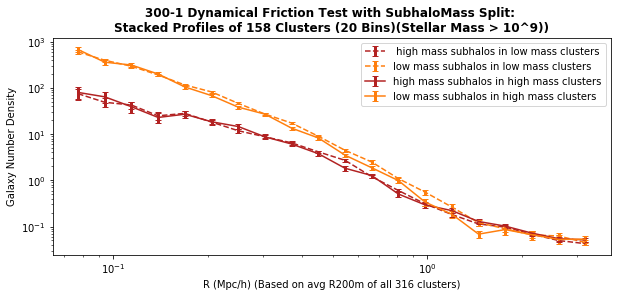

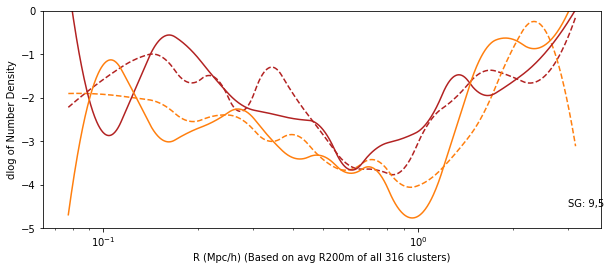

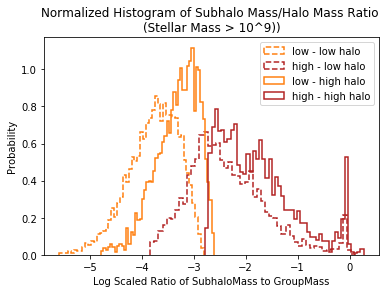

In [33]:
# CONTINUED PLOTTING of DYNAMICAL FRICTION PROFILES

w = 9
p = 5
dlog_data_SG_x1, dlog_data_SG_y1, yy_fine1, xx_fine1 = get_slope_sg((R_AVG/R_avgDF)*bin_stackDF, (Yi_avgDF), 1000,w,p)  
dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg((R_AVG/R_avgDF)*bin_stackDF, (Yi_avg_blueDF), 1000,w,p)  
dlog_data_SG_x_r1, dlog_data_SG_y_r1, yy_fine_r1, xx_fine_r1 = get_slope_sg((R_AVG/R_avgDF)*bin_stackDF, (Yi_avg_redDF), 1000,w,p)  
dlog_data_SG_x_g1, dlog_data_SG_y_g1, yy_fine_g1, xx_fine_g1 = get_slope_sg((R_AVG/R_avgDF)*bin_stackDF, (Yi_avg_greenDF), 1000,w,p)  

dlog_data_SG_x2, dlog_data_SG_y2, yy_fine2, xx_fine2 = get_slope_sg(bin_stackDF2, (Yi_avgDF2), 1000,w,p)  
dlog_data_SG_x_b2, dlog_data_SG_y_b2, yy_fine_b2, xx_fine_b2 = get_slope_sg((R_AVG/R_avgDF2)*bin_stackDF2, (Yi_avg_blueDF2), 1000,w,p)  
dlog_data_SG_x_r2, dlog_data_SG_y_r2, yy_fine_r2, xx_fine_r2 = get_slope_sg((R_AVG/R_avgDF2)*bin_stackDF2, (Yi_avg_redDF2), 1000,w,p)  
dlog_data_SG_x_g2, dlog_data_SG_y_g2, yy_fine_g2, xx_fine_g2 = get_slope_sg((R_AVG/R_avgDF2)*bin_stackDF2, (Yi_avg_greenDF2), 1000,w,p)  


# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar((R_AVG/R_avgDF)*bin_stackDF, Yi_avg_redDF, yerr = boot_err_redDF, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = ' high mass subhalos in low mass clusters', ls='--')
plt.errorbar((R_AVG/R_avgDF)*bin_stackDF, Yi_avg_greenDF, yerr = boot_err_greenDF, c='tab:orange', ecolor = 'tab:orange', elinewidth = 3, capsize=3, label = 'low mass subhalos in low mass clusters', ls='--')
plt.errorbar((R_AVG/R_avgDF2)*bin_stackDF2, Yi_avg_redDF2, yerr = boot_err_redDF2, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'high mass subhalos in high mass clusters')
plt.errorbar((R_AVG/R_avgDF2)*bin_stackDF2, Yi_avg_greenDF2, yerr = boot_err_greenDF2, c='tab:orange', ecolor = 'tab:orange', elinewidth = 3, capsize=3, label = 'low mass subhalos in high mass clusters')
#plt.plot(xx_fine_r1,yy_fine_r1, 'lightblue')
#plt.plot(xx_fine_g1,yy_fine_g1, 'lightblue')
#plt.plot(xx_fine_r2,yy_fine_r2, 'lightblue')
#plt.plot(xx_fine_g2,yy_fine_g2, 'lightblue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h) (Based on avg R200m of all 316 clusters)')#('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
#plt.title('300-1 Dynamical Friction Test: Stacked Profiles of 158 Clusters (All > 5*10^13)\n(ALL SUBHALOS IN DIST) (%s Bins)(Stellar Mass > 10^%s))' %(bins, M), fontweight = 'bold', wrap=True)
plt.title('300-1 Dynamical Friction Test with SubhaloMass Split: \nStacked Profiles of 158 Clusters (%s Bins)(Stellar Mass > 10^%s))' %(bins, M), fontweight = 'bold', wrap=True)

plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick', ls='--')
plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'tab:orange',ls='--')
plt.plot(dlog_data_SG_x_r2, dlog_data_SG_y_r2, c = 'firebrick')
plt.plot(dlog_data_SG_x_g2, dlog_data_SG_y_g2, c = 'tab:orange')
plt.xscale('log')
plt.xlabel('R (Mpc/h) (Based on avg R200m of all 316 clusters)')#('R/R200m')
plt.ylabel('dlog of Number Density')
plt.text(3,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)

plt.figure()
plt.hist(np.log10(red2_ratioDF), bins=50, label = 'low - low halo', density=True, stacked=True, color='tab:orange', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red1_ratioDF), bins=50, label = 'high - low halo',density=True,stacked=True,color='firebrick', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red2_ratioDF2), bins=50, label = 'low - high halo', density=True, stacked=True, color='tab:orange', histtype='step', lw = 1.5)
plt.hist(np.log10(red1_ratioDF2), bins=50, label = 'high - high halo',density=True,stacked=True,color='firebrick', histtype='step', lw = 1.5)
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio \n(Stellar Mass > 10^%s))' %(M))
plt.legend()

In [ ]:
#MCMC FITTING DYN FRICTION PROFILES
t0 = time.time()
import corner
labels = [r'$\log(\alpha)$', r'$\log(\beta)$', r'$\log(\gamma)$', r'$\log(r_s)$', r'$\log(r_t)$', r'$\log(\rho_s)$', r'$\log(\rho_0)$', r'$s_e$']
profiles = [Yi_avg_redDF,Yi_avg_greenDF,Yi_avg_redDF2,Yi_avg_greenDF2]
covs = [cov_redDF,cov_greenDF,cov_redDF2,cov_greenDF2]
#best_fit_mcmc = 0
#best_fit_mcmc_blue = 0
#best_fit_mcmc_red = 0
#best_fit_mcmc_green = 0
best_fit_mcmc_list_DF = []#[best_fit_mcmc, best_fit_mcmc_blue, best_fit_mcmc_red, best_fit_mcmc_green]
samples_list = []
for i in range(len(profiles)):
    averaged_r_tot = bin_stack1 #in Mpc/h
    averaged_rho_tot = profiles[i]#Yi_avg1
    cov = covs[i]
    
    # Fit TNG_300-1 Profiles
    data = [averaged_r_tot, averaged_rho_tot, cov]
    args = (averaged_r_tot, averaged_rho_tot, cov)
    # Set initial guess and boundaries and use minimization to determine start position of MCMC chain
    #lg_alpha, lg_beta, lg_gamma, lg_r_s, lg_r_t, lg_rho_s, lg_rho_0, s_e = theta
    #init_theta = np.array([-0.50257944, 0.58536, 0.90564052,  -0.5, 0.35784823, 13.8549328, 8.051313892 , 1.30773031])
    #init_theta = np.array([-.92, 0.78, 0.60, -0.61, 0.34, 2.7, -.3 , 1.66])
    init_theta = np.array([-.92, 0.78, 0.60, -0.61, 0.34, 2, 3 , 1.66])


    bounds = ((-2, 2),(-1.4, 3), (-1.2,3), (-2, 0.7), (-2, 0.7), (-1, 30), (-1, 30), (.1, 10)) 
    ndim = 8 #number of free parameters
    neg_ll3d = lambda *args: -ln_like3d(*args)

    res = scipy.optimize.minimize(neg_ll3d, init_theta, args=args, method='SLSQP', options = {'maxiter':500}, bounds=bounds)

    # Run MCMC
    n_burn = 10000#500?? or 1000
    n_dim, n_walkers = 8, 128#128 #increasing walkers from 500 to 1000 seemed to help, maybe return n_iter and n_burn to lower values
    n_iter = 5000#5000
    # better with 10000, 1000,10000 but took a long time
    p0 = [res.x + 1e-3*np.random.randn(n_dim) for i in range(n_walkers)]
    sampler, pos, prob, state = main(p0, n_walkers, n_iter, n_dim, ln_prob3d, data)
    samples = sampler.flatchain
    corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84], show_titles=True);
    samples_list.append(samples)
    best_fit_mcmc_list_DF.append(samples[np.argmax(sampler.flatlnprobability)])


print('done MCMC',time.time()-t0)

Running burn-in...


 53%|█████▎    | 5255/10000 [02:08<01:57, 40.55it/s]

In [ ]:
colors = ['firebrick','#fa5f1b','firebrick','#fa5f1b']
labels = ['Red1-low','Red2-low','Red1-high','Red2-high']
ls_list = ['--','--','-','-']


plt.figure(figsize=(10,13))#(20,28))
ax0 = plt.subplot(3,1,1)
ax1 = plt.subplot(3,1,2)
ax2 = plt.subplot(3,1,3)
plt.tight_layout()
halo_masses = []
for h_i in halo_array_masked:
    halo_masses.append(halo_grp['GroupMass'][h_i]*1e10)


for i in range(len(colors)):
    best_fit_mcmc = best_fit_mcmc_list_DF[i]
    averaged_rho_tot = profiles[i]
    r_thr = np.logspace(np.log10(np.min(averaged_r_tot)), np.log10(np.max(averaged_r_tot)), 3000)

    log_deriv_mcmc = r_thr/rho_DK14(best_fit_mcmc,r_thr)*np.gradient(rho_DK14(best_fit_mcmc,r_thr), r_thr)

    r_sp = r_thr[np.argmin(log_deriv_mcmc)]
    #plt.subplot(3,1,1)
    '''
    bins0 = np.logspace(np.min(np.log10(halo_masses)), 
                       np.max(np.log10(halo_masses)), 30)

    ax0.hist(halo_masses, bins=bins0, color = 'cadetblue')
    title_str = r"Mass Distribution of %s Clusters ($\overline{m}$= " % (Number_of_halos)
    title_str += ("{:.3E} $M\odot$)").format(np.mean(halo_masses))
    ax0.set_title(title_str+' (Minimum = 5*10$^{13}$)', fontweight="bold")
    ax0.set_xlabel(r"Cluster Mass ($M_{\odot}$)")
    ax0.set_ylabel("Count")
    ax0.set_xscale("log")
    ax0.set_yscale("log")

    '''
    #plt.subplot(3,1,2)
    ax1.plot(r_thr, rho_DK14(best_fit_mcmc, r_thr), color=colors[i], linestyle=ls_list[i] 
             , label="Model Fit %s" %(labels[i]))
    ax1.errorbar(averaged_r_tot, averaged_rho_tot, 
                 yerr=np.sqrt(np.diag(cov)), 
                 marker = '.', color = colors[i], linestyle = "none",
                 markersize = 5, ecolor = colors[i], elinewidth = 1, capsize=2, 
                 markeredgewidth=1, label="Data %s" %(labels[i]))
    #plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategray', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
    ax1.axvline(r_sp, linestyle=ls_list[i], color=colors[i])
    ax1.legend(frameon=False, loc="upper right")
    ax1.set_title("300-1 Galaxy Number Density Profiles (Subhalos > 10$^{%s}$, Bins = %s)" %(M,bins), fontweight="bold")
    ax1.set_xlabel(r"$r$ [h$^{-1}$Mpc]")
    ax1.set_ylabel(r"$\rho$ [$M_{\odot}h^3$Mpc$^{-3}$]")
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlim(0.1, 3) #2


    #plt.subplot(3,1,3)
    ax2.plot(r_thr, log_deriv_mcmc, label='Rsp = %s' %(r_sp), color=colors[i], linestyle=ls_list[i])
    ax2.axvline(r_sp, linestyle=ls_list[i], color=colors[i])
    ax2.set_xscale("log")
    ax2.set_title("Log Derivatives of Model Fits", fontweight="bold", color="k")
    ax2.set_xlabel(r"$r$ [h$^{-1}$Mpc]")
    ax2.set_ylabel(r"$d\log \rho / d \log r$")
    ax2.set_xlim(0.1, 3)#2
    ax2.legend(frameon=False, loc="lower right")

plt.tight_layout()
plt.show()


plt.figure()
plt.hist(np.log10(red2_ratio21), bins=50, label = 'Red2 - low', density=True, stacked=True, color='tab:orange', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red1_ratio21), bins=50, label = 'Red1 - low',density=True,stacked=True,color='firebrick', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red2_ratio22), bins=50, label = 'Red2 - high', density=True, stacked=True, color='tab:orange', histtype='step', lw = 1.5)
plt.hist(np.log10(red1_ratio22), bins=50, label = 'Red1 - high',density=True,stacked=True,color='firebrick', histtype='step', lw = 1.5)
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio \n(Stellar Mass > 10^%s))' %(M))
plt.legend()

## Initial Dynamical Friction Histograms

6926 [0.836208164691925, 0.04715836048126221, 0.008932583965361118, 0.004133705981075764, 0.0015359623357653618, 0.0016187879955396056, 0.0017632900271564722, 0.0014121757121756673, 0.000726063852198422, 0.0015406700549647212]
11885 [0.00033688885741867125, 0.0002524737792555243, 0.00022726578754372895, 0.00020425437833182514, 0.000215161097003147, 0.0002672770933713764, 0.00022889897809363902, 0.0002085890300804749, 0.00017869757721200585, 0.00022504683875013143]
6658 11612
276.70343 126.50072
73129.44 4124.1694
73129.44 4124.1694
[1.0868904e+04 6.1980766e+04 0.0000000e+00 0.0000000e+00 2.7670343e+02
 3.0654702e+00] [3.1425165e+02 3.6823003e+03 0.0000000e+00 0.0000000e+00 1.2650072e+02
 1.1166244e+00]


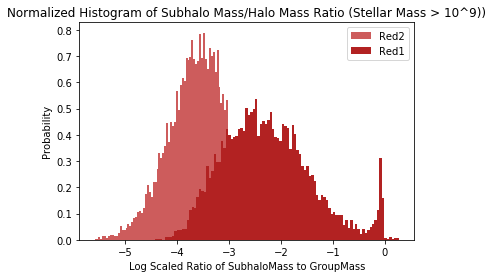

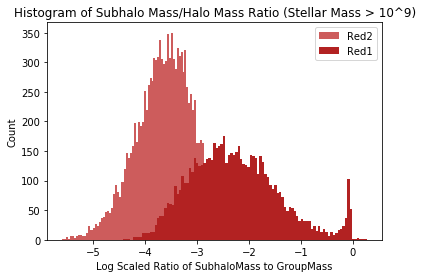

In [53]:
# Dynamical Friction Histograms

print(len(red1_ratio2), red1_ratio2[:10])
print(len(red2_ratio2), red2_ratio2[:10])
print(sum(number_red1), sum(number_red2))
print(subhalo_table['StellarMass'][0],subhalo_table['StellarMass'][1])
print(subhalo_table['SubhaloMass'][0],subhalo_table['SubhaloMass'][1])
print(subhalo_grp['SubhaloMass'][0],subhalo_grp['SubhaloMass'][1])
print(subhalo_grp['SubhaloMassType'][0],subhalo_grp['SubhaloMassType'][1])

plt.figure()
plt.hist(np.log10(red2_ratio2), bins=100, label = 'Red2', density=True, stacked=True, color='indianred')
plt.hist(np.log10(red1_ratio2), bins=100, label = 'Red1',density=True,stacked=True,color='firebrick')
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio (Stellar Mass > 10^%s))' %(M))
plt.legend()

plt.figure()
plt.hist(np.log10(red2_ratio2), bins=100, label = 'Red2', density=False, stacked=True, color = 'indianred')
plt.hist(np.log10(red1_ratio2), bins=100, label = 'Red1',density=False,stacked=True, color='firebrick')
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Count')
plt.title('Histogram of Subhalo Mass/Halo Mass Ratio (Stellar Mass > 10^%s)' %(M))
plt.legend()


## Finding Nearby Halos

[3 1 3 0 0 0 1 1 1 0 0 0 1 0 1 2 1 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


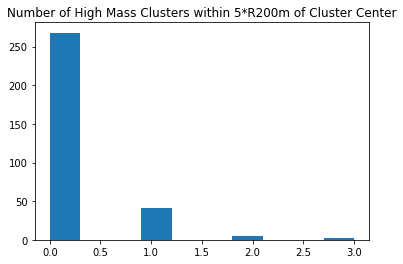

In [57]:
# Finding Nearby Halos

#print(len(subhalo_table_clean), len(subhalo_table_m))
#print(subhalo_table_clean['StellarMass'][1000:1050]*1e10)
#print(subhalo_table_m['StellarMass'][1000:1050]*1e10)
halos_nearby = []
for h_i in halo_array_masked[:]:
    CM_halo = halo_grp['GroupCM'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    #dev = np.array(CM_HALOS - CM_halo) #has all subhalos > mass cut
    N = 0
    for h_j in halo_array_masked[:]:
        if h_j != h_i:
            CM_halo_j = halo_grp['GroupCM'][h_j]
            R = np.linalg.norm(CM_halo_j-CM_halo)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
            #if h_i == 0:
                #print(R200m,R)
            if (R<=5*R200m):
                N += 1
    halos_nearby.append(N)
halos_nearby = np.array(halos_nearby)
print(halos_nearby)
plt.figure()
plt.hist(halos_nearby)
plt.title('Number of High Mass Clusters within 5*R200m of Cluster Center')
plt.show()




# Color Plots, Abundance Plots (2d and 1d histograms)

In [77]:
plt.rcParams['figure.facecolor'] = 'w'
import matplotlib.gridspec as gridspec

#BASIC CUTS APPLIED TO SUBHALOS
mag = basic_sub_cuts(subhalo_grp,'SubhaloStellarPhotometrics')
sfr = basic_sub_cuts(subhalo_grp,'SubhaloSFR')
# SUBHALO MASS MASKING
mass = basic_sub_cuts(subhalo_grp,'SubhaloMassType') #previously SubhaloMassInHalfRad (no type specification or index chosen)
mass2 = basic_sub_cuts(subhalo_grp,'SubhaloMassInHalfRad') 
print(np.shape(mass))
subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
subhalomass2 = np.array(np.log10(mass2*1e10/0.704))
#mask = ((subhalo_grp['SubhaloMassInHalfRad'][:,4]*1e10)>(10**9.5))
mask1 = subhalomass>9 #previouslt it was >9.5
mask2 = subhalomass2>9.5
#basic_cuts(subhalo_grp, 'Subhalo')
print("Subhalos with total halfradmass >9.5:",len(mag[mask2]))
print("Subhalos with stellar mass > 9:", len(mag[mask1]))
group_numbers = basic_sub_cuts(subhalo_grp,'SubhaloGrNr')
sub_pos = basic_sub_cuts(subhalo_grp, 'SubhaloCM')
mag = mag[mask1]
sfr = sfr[mask1]

# CLUSTER MASS MASKING
w = (group_numbers[mask1])
cluster_mass = []
for h_i in group_numbers[mask1]:
    cluster_mass.append(halo_grp["GroupMass"][h_i]*1e10/.704)
cluster_mass = np.array(cluster_mass)
cluster_mass_mask = (cluster_mass > (5*(10**13)))

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


In [75]:
# WITHIN 1 MPC MASKING (OPTIONAL)
chosen_subs_group_numbers = group_numbers[mask1][cluster_mass_mask]
dist_list = []
scale_factor = header['Time']
for i in range(len(chosen_subs_group_numbers)):
    h_i = chosen_subs_group_numbers[i]
    dev = (sub_pos[mask1][cluster_mass_mask])[i] - halo_grp['GroupCM'][h_i]
    dist = np.linalg.norm(dev)*.001*scale_factor/.704
    dist_list.append(dist)
dist_array = np.array(dist_list)
#print(dist_array)

dist_list2 = []
all_subs_group_numbers = group_numbers[mask1]
for i in range(len(all_subs_group_numbers)):
    h_i = all_subs_group_numbers[i]
    dev2 = (sub_pos[mask1])[i] - halo_grp['GroupCM'][h_i]
    dist2 = np.linalg.norm(dev2)*.001*scale_factor/.704
    dist_list2.append(dist2)
dist_array2 = np.array(dist_list2)

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


KeyboardInterrupt: 

In [143]:
#subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
metals = basic_sub_cuts(subhalo_grp,'SubhaloStarMetalFractions')[mask1]

H_abund = metals[:,0]
H_abund_cl = metals[:,0][cluster_mass_mask]
He_abund = metals[:,1]
He_abund_cl = metals[:,1][cluster_mass_mask]
C_abund = metals[:,2]
C_abund_cl = metals[:,2][cluster_mass_mask]
N_abund = metals[:,3]
N_abund_cl = metals[:,3][cluster_mass_mask]

stellar_mass = subhalomass[mask1]
stellar_mass_cl = stellar_mass[cluster_mass_mask]

sfr_cl = sfr[cluster_mass_mask]

#G-R, R-Z MAGNITUDE ARRAYS MASKED FOR SUBHALO SELECTION
mag1 = mag[cluster_mass_mask]
mag2 = mag1[dist_array <= 1.]
mag3 = mag1[dist_array > 1.]
mag4 = mag[dist_array2 > 2.]
#mag = mag[(group_numbers < 1154)&(mask)]
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]
g_minus_i = mag[:,4]-mag[:,6]
r_band = mag[:,5]
i_band = mag[:,6]
g_minus_r_cl = mag1[:,4]-mag1[:,5]
r_minus_z_cl = mag1[:,5]-mag1[:,7]
g_minus_i_cl = mag1[:,4]-mag1[:,6]
r_band_cl = mag1[:,5]
i_band_cl = mag1[:,6]
g_minus_r_cl2 = mag2[:,4]-mag2[:,5]
r_minus_z_cl2 = mag2[:,5]-mag2[:,7]
r_band_cl2 = mag2[:,5]
g_minus_r_f = mag3[:,4]-mag3[:,5]
r_minus_z_f = mag3[:,5]-mag3[:,7]
g_minus_r_f2 = mag4[:,4]-mag4[:,5]
r_minus_z_f2 = mag4[:,5]-mag4[:,7]
print("mag lengths:",len(mag), len(mag1), len(mag2), len(mag3), len(mag4))
#print(group_numbers[mask][-100:])
#print(w[-1000:])
#print(cluster_mass)
    
# COLOR-CUTS
b1 = .25
b2 = .59
r1 = .61
r2 = .73

mag lengths: 268208 24706 19298 5408 810


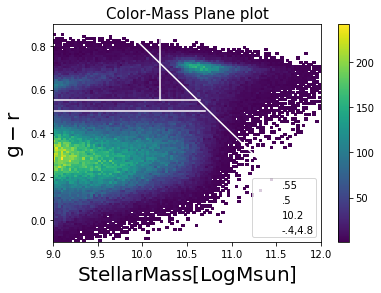

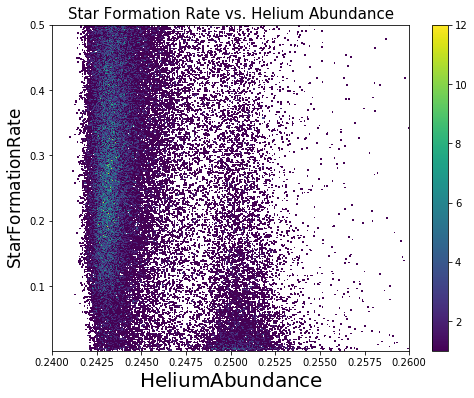

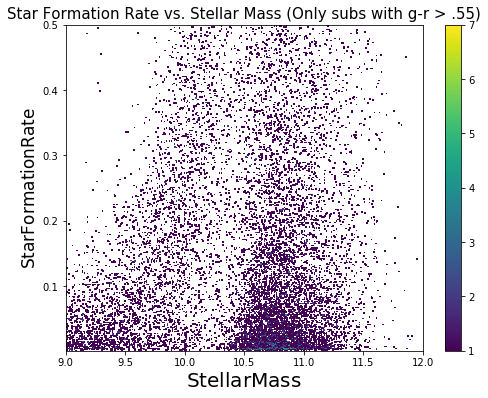

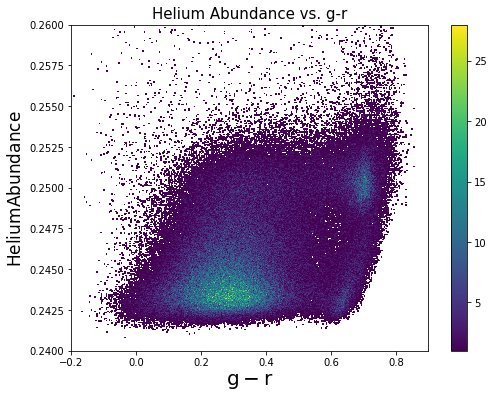

In [170]:
# COLOR-MASS PLOT
# RANGE OPTIONS
#range_hist = [[0, 0.8], [0, 0.8]] #old
range_hist = [[-.2, .9], [-.2, .8]]
#range_hist = [[.5, 0.9], [.2, 0.8]]

gmr = g_minus_r_cl
rmz = r_minus_z_cl

'''
# NUMPY HISTOGRAM WITH IMSHOW FOR OVERDENSITY PLOTS
fig1 = plt.figure(figsize = (20,15))
gs1 = gridspec.GridSpec(10,12)
ax1 = plt.subplot(gs1[3:8, 5:10])  
ax1.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax1.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
ax1.set_title("300-1 Overdensity Color-Color plot \n (Inside 2 Mpc of selected, outside 2 Mpc of all)", fontsize = 15) #   (Subhalos in Selected Clusters)

#h, x, y = np.histogram2d(g_minus_r, r_minus_z, bins = 50, range=range_hist)
h_f, x_f, y_f = np.histogram2d(g_minus_r_f2, r_minus_z_f2, bins = 50, range=range_hist, weights = None)
#h_ND = h/(.007*.008)
#avg = np.mean(h)
avg = np.average(h_f, weights = (h_f > 0))
h_cl2, x_cl2, y_cl2 = np.histogram2d(g_minus_r_cl2, r_minus_z_cl2, bins = 50, range=range_hist, weights = None)
#h_ND_cl = h_cl/(.007*.008)
print(avg)
overdens = np.zeros(np.shape(h_cl2.T))
for i in range(len(h_cl2.T[:,0])):
    for j in range(len(h_cl2.T[0,:])):
        if h_cl2.T[i,j] == 0:
            overdens[i,j] = 0
        else:
            overdens[i,j] = (h_cl2.T[i,j]/len(g_minus_r_cl2)) - (avg/len(g_minus_r_f2)) #/len(g_minus_r_f) #
#overdens = h_cl2.T - avg
print(len(g_minus_r_cl2), len(g_minus_r_f2))
H2 = ax1.imshow(overdens, origin='lower', extent=[-.2, 0.9,-.2, 0.8], cmap = 'coolwarm')
fig1.colorbar(H2, ax=ax1)
'''
'''
# COLOR-COLOR PLOT SPECIFICATIONS (CHANGE DEPENDING ON WHETHER 1D HIST INCLUDED OR NOT)
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(10,12)
ax0 = plt.subplot(gs[3:8, 5:10])  
axx = plt.subplot(gs[8:10, 5:10], sharex=ax0)  ##
axx.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax0.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
if np.shape(gmr) == np.shape(g_minus_r):
    ax0.set_title("300-1 Color-Color plot", fontsize = 15) #   (Subhalos in Selected Clusters)
elif np.shape(gmr) == np.shape(g_minus_r_cl):
    ax0.set_title("300-1 Color-Color plot (Subhalos in Selected Clusters)", fontsize = 15) #   
elif np.shape(gmr) == np.shape(g_minus_r_cl2):
    ax0.set_title("300-1 Color-Color plot (Subhalos within 1 Mpc of Selected Clusters)", fontsize = 15) #   

#ax0.plot([b1,b1],np.linspace(0,0.8,2), c = 'b', label = b1, linewidth=1) #left blue bound
#ax0.plot([b2,b2],np.linspace(0,0.8,2), c = 'b', label = b2, linewidth=1)
#ax0.plot([r1,r1],np.linspace(0,0.8,2), c = 'r', label = r1, linewidth=1)
#ax0.plot([r2,r2],np.linspace(0,0.8,2), c = 'r', label = r2, linewidth=1)
ax0.legend()
fig.tight_layout()

# 2D AND 1D MATPLOTLIB HISTOGRAMS
h_cl, x_cl, y_cl = np.histogram2d(gmr, rmz, bins = 100, range=range_hist)
H = ax0.hist2d(gmr, rmz , bins = 200, cmap='viridis', range=range_hist, weights=None, cmin = .1, cmax = None)#range=[[0.4, 0.7], [0.5, 0.8]])
h_cl200, x_cl200, y_cl200 = np.histogram2d(gmr, rmz, bins = 200, range=range_hist)
 
#H = ax0.imshow(h_cl200.T, origin='lower', extent=[0, 0.8,0, 0.8], cmap = 'viridis')
#ax0.contour(H[0].T, extent = [H[1][0], H[1][-1], H[2][0], H[2][-1]], linewidths=3, cmap = 'viridis') #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
level_list = [2,30,60,99,100]#[1,15,30,49]
ax0.contour(h_cl.T, extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]], linewidths=1, cmap = 'autumn', levels = level_list) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
axx.hist(gmr, bins = H[1], range = [-.2,0.9])
plt.show()
#[1,15,30,49] extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]]
#fig.colorbar(H[3], ax=ax0)
'''

# COLOR-MASS PLOT
plt.figure()
plt.hist2d(stellar_mass, g_minus_r, bins = 100, cmap = 'viridis', range=[[9, 12], [-.1, .9]], cmin=.01)
#plt.scatter(stellar_mass, g_minus_r)
plt.plot([9,10.65], [.55,.55], c = 'w', label='.55')
plt.plot([9,10.7], [.50,.50], c = 'w', label='.5')
plt.plot([10.2,10.2], [.55,.9], c = 'w', label='10.2')
#plt.plot([9.75,11.5],[.9,.2], c = 'w', label='[9.75,11.5],\n[.9,.2]')
x = np.array([9.,10.,12.])
plt.plot(x,(-.4*x)+4.8, c='w', label='-.4,4.8')
#plt.plot(stellar_mass, (stellar_mass*0.054)+.05, c = 'w')
#plt.colorbar()
plt.xlabel("$\mathrm{Stellar Mass [Log Msun]}$", fontsize = 20)
plt.ylabel("$\mathrm{g-r}$", fontsize = 20)
plt.title("Color-Mass Plane plot", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
plt.legend(loc='lower right', borderpad=.2)

'''
# COLOR-MAGNITUDE PLOT
plt.figure()
plt.hist2d(i_band_cl, mag1[:,5]-mag1[:,6], bins = 100, cmap = 'viridis', cmin=.01)
plt.xlabel("$\mathrm{i}$", fontsize = 20)
plt.ylabel("$\mathrm{r-i}$", fontsize = 20)
plt.title("Color-Magnitude Plot (subs in selected clusters)", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
'''

# STAR FORMATION PLOT
plt.figure(figsize=(8,6))#12,6?
plt.hist2d(He_abund, sfr, bins=500, cmap='viridis', cmin=.01, range=[[.24,.26], [0.001,.5]])
plt.xlabel("$\mathrm{Helium Abundance}$", fontsize = 20)
plt.ylabel("$\mathrm{Star Formation Rate}$", fontsize = 17)
plt.title("Star Formation Rate vs. Helium Abundance", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# STAR FORMATION PLOT
plt.figure(figsize=(8,6))
plt.hist2d(stellar_mass[g_minus_r > .55], sfr[g_minus_r > .55], bins=500, cmap='viridis', cmin=.01, range=[[9,12], [0.001,.5]])
plt.xlabel("$\mathrm{Stellar Mass}$", fontsize = 20)
plt.ylabel("$\mathrm{Star Formation Rate}$", fontsize = 17)
plt.title("Star Formation Rate vs. Stellar Mass (Only subs with g-r > .55)", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# STAR FORMATION PLOT
plt.figure(figsize=(8,6))
plt.hist2d(g_minus_r, He_abund, bins=500, cmap='viridis', cmin=.01, range=[[-.2,.9], [0.24,.26]])
plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
plt.ylabel("$\mathrm{Helium Abundance}$", fontsize = 17)
plt.title("Helium Abundance vs. g-r", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# (subs in selected clusters)

# Color Splitting Profiles (OLD)

Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after total masking: 121
len of all, blue, red: 121 21 30 70
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
galaxies [4, 3, 5, 3, 6, 7, 8, 15, 13, 11, 13, 21, 6, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 3, 5, 1, 2, 6, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 1, 1, 2, 3, 4, 2, 1, 2, 5, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [3, 1, 4, 2, 4, 4, 4, 8, 6, 9, 9, 10, 4, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 115

Halo: 13
Halo Mass: 27343.611
N Subhalos: 1930
N Subhalos after first masking: 1884
N Subhalos after total masking: 137
len of all, blue, red: 137 54 30 53
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
galaxies [0, 1, 0, 0, 2, 1, 2, 8, 14, 24, 31, 24, 16, 6, 5, 1, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 1, 2, 2, 4, 5, 10, 11, 8, 3, 4, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 8, 5, 2, 2, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0

N Subhalos after first masking: 1496
N Subhalos after total masking: 88
len of all, blue, red: 88 17 18 53
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
galaxies [1, 1, 4, 3, 8, 7, 3, 9, 10, 15, 11, 11, 3, 0, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 6, 1, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 1, 4, 2, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 3, 2, 3, 5, 3, 7, 6, 11, 6, 5, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 87

Halo: 28
Halo Mass: 18303.37
N Subhalos: 1259
N Subhalos after first masking: 1246
N Subhalos after total masking: 88
len of all, blue, red: 88 18 21 49
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
galaxies [0, 1, 2, 3, 4, 0, 6, 8, 10, 16, 16, 10, 4, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 0, 2, 1, 2, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]


N Subhalos after first masking: 1201
N Subhalos after total masking: 85
len of all, blue, red: 85 25 21 39
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
galaxies [0, 0, 1, 2, 3, 10, 9, 6, 6, 13, 9, 6, 9, 7, 1, 3, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 3, 3, 0, 0, 4, 2, 2, 5, 3, 0, 2, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 3, 1, 5, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 6, 5, 3, 5, 4, 6, 0, 4, 1, 1, 1, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 43
Halo Mass: 15200.831
N Subhalos: 1214
N Subhalos after first masking: 1206
N Subhalos after total masking: 86
len of all, blue, red: 86 22 15 49
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
galaxies [0, 3, 2, 5, 2, 8, 17, 10, 5, 9, 10, 8, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 1, 0, 6, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red g

N Subhalos after first masking: 858
N Subhalos after total masking: 74
len of all, blue, red: 74 17 15 42
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [2, 0, 3, 3, 6, 7, 2, 7, 8, 3, 7, 6, 8, 3, 3, 1, 2, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 5, 0, 2, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 3, 3, 4, 5, 1, 5, 5, 2, 0, 4, 5, 2, 0, 1, 0, 0, 0, 0]
sum of galaxies: 71

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking: 88
len of all, blue, red: 88 22 12 54
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 0, 0, 0, 0, 1, 5, 10, 19, 14, 8, 16, 9, 5, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 2, 7, 4, 1, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 4, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 728
N Subhalos after total masking: 46
len of all, blue, red: 46 8 8 30
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
galaxies [1, 2, 1, 3, 5, 2, 2, 7, 7, 5, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 3, 3, 2, 1, 5, 2, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 41

Halo: 73
Halo Mass: 11412.425
N Subhalos: 955
N Subhalos after first masking: 940
N Subhalos after total masking: 55
len of all, blue, red: 55 19 14 22
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
galaxies [1, 2, 3, 1, 3, 3, 2, 3, 5, 3, 9, 9, 6, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 5, 2, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies 

N Subhalos after first masking: 847
N Subhalos after total masking: 62
len of all, blue, red: 62 14 14 34
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
galaxies [1, 1, 2, 1, 1, 5, 3, 6, 3, 9, 10, 6, 7, 6, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 6, 1, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 3, 1, 3, 3, 6, 3, 5, 4, 4, 0, 0, 0, 0, 0, 0]
sum of galaxies: 61

Halo: 88
Halo Mass: 10377.713
N Subhalos: 915
N Subhalos after first masking: 904
N Subhalos after total masking: 54
len of all, blue, red: 54 15 16 23
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
galaxies [1, 0, 2, 0, 2, 3, 1, 1, 6, 6, 13, 3, 5, 3, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 767
N Subhalos after total masking: 47
len of all, blue, red: 47 24 8 15
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
galaxies [1, 0, 0, 0, 2, 4, 8, 3, 5, 6, 5, 4, 3, 4, 2, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 0, 0, 2, 2, 2, 0, 3, 5, 4, 0, 2, 1, 2, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 3, 0, 0, 0, 0, 0, 0]
sum of galaxies: 47

Halo: 103
Halo Mass: 9901.212
N Subhalos: 770
N Subhalos after first masking: 763
N Subhalos after total masking: 55
len of all, blue, red: 55 18 16 21
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
galaxies [1, 1, 2, 3, 2, 4, 3, 4, 3, 3, 2, 7, 9, 6, 4, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0]
red galaxies counted [1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0]
red galaxies cou

N Subhalos after first masking: 687
N Subhalos after total masking: 56
len of all, blue, red: 56 26 9 21
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [3, 3, 3, 2, 1, 2, 5, 10, 3, 4, 7, 5, 4, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 1, 0, 0, 1, 0, 4, 2, 3, 4, 5, 3, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 2, 1, 0, 5, 3, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking: 64
len of all, blue, red: 64 30 10 24
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 1, 0, 0, 5, 4, 3, 4, 3, 3, 10, 3, 16, 9, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 5, 2, 10, 4, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 659
N Subhalos after total masking: 41
len of all, blue, red: 41 9 6 26
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
galaxies [1, 2, 1, 5, 0, 1, 3, 3, 7, 3, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 5, 0, 1, 3, 2, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 38

Halo: 133
Halo Mass: 8327.565
N Subhalos: 503
N Subhalos after first masking: 495
N Subhalos after total masking: 41
len of all, blue, red: 41 6 7 28
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
galaxies [0, 2, 2, 2, 2, 1, 2, 4, 6, 7, 3, 1, 4, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies cou

N Subhalos after first masking: 729
N Subhalos after total masking: 45
len of all, blue, red: 45 23 11 11
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
galaxies [0, 0, 0, 0, 0, 1, 4, 1, 3, 7, 9, 5, 5, 9, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 3, 5, 3, 5, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 0, 1, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 45

Halo: 148
Halo Mass: 8410.298
N Subhalos: 755
N Subhalos after first masking: 745
N Subhalos after total masking: 39
len of all, blue, red: 39 12 11 16
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
galaxies [0, 1, 0, 0, 0, 2, 6, 9, 4, 1, 5, 6, 2, 1, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
red galaxies

N Subhalos after first masking: 651
N Subhalos after total masking: 43
len of all, blue, red: 43 13 11 19
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
galaxies [0, 1, 0, 2, 2, 3, 4, 7, 6, 7, 3, 4, 2, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 3, 4, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 2, 3, 2, 5, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 43

Halo: 163
Halo Mass: 7904.2363
N Subhalos: 617
N Subhalos after first masking: 602
N Subhalos after total masking: 43
len of all, blue, red: 43 17 8 18
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
galaxies [1, 0, 0, 1, 8, 5, 6, 3, 5, 3, 6, 2, 0, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 2, 3, 3, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies 

N Subhalos after first masking: 815
N Subhalos after total masking: 40
len of all, blue, red: 40 18 10 12
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 1, 0, 0, 0, 1, 2, 2, 0, 4, 4, 4, 3, 2, 3, 9, 2, 1, 2, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 5, 2, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 0, 2, 0]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 40

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking: 39
len of all, blue, red: 39 15 5 19
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [1, 0, 2, 0, 4, 3, 2, 5, 6, 6, 2, 0, 4, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 2, 1, 3, 1, 0, 4, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies

N Subhalos after first masking: 501
N Subhalos after total masking: 32
len of all, blue, red: 32 4 8 20
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
galaxies [0, 1, 2, 0, 1, 1, 2, 3, 10, 4, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 2, 0, 0, 1, 2, 2, 6, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 31

Halo: 193
Halo Mass: 7080.1284
N Subhalos: 633
N Subhalos after first masking: 619
N Subhalos after total masking: 39
len of all, blue, red: 39 15 6 18
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
galaxies [0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 7, 2, 4, 2, 5, 7, 5, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 6, 1, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
red galaxies


Halo: 207
Halo Mass: 6543.4116
N Subhalos: 488
N Subhalos after first masking: 478
N Subhalos after total masking: 30
len of all, blue, red: 30 7 9 14
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
galaxies [2, 3, 0, 3, 1, 2, 0, 2, 4, 5, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 3, 0, 1, 1, 2, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 28

Halo: 208
Halo Mass: 6570.345
N Subhalos: 476
N Subhalos after first masking: 471
N Subhalos after total masking: 29
len of all, blue, red: 29 12 5 12
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
galaxies [1, 0, 1, 2, 4, 0, 2, 3, 0, 7, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 2, 1, 0, 1, 2, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 0, 0

N Subhalos after first masking: 427
N Subhalos after total masking: 37
len of all, blue, red: 37 9 8 20
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
galaxies [0, 2, 2, 4, 1, 0, 5, 3, 4, 3, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 2, 2, 4, 0, 0, 3, 1, 2, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 36

Halo: 223
Halo Mass: 6099.7847
N Subhalos: 524
N Subhalos after first masking: 512
N Subhalos after total masking: 28
len of all, blue, red: 28 15 5 8
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
galaxies [1, 1, 1, 1, 0, 1, 1, 4, 3, 7, 4, 1, 3, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 3, 3, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies c

len of all, blue, red: 31 7 7 17
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 1, 1, 1, 2, 1, 3, 2, 2, 4, 4, 3, 5, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 29

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking: 28
len of all, blue, red: 28 10 5 13
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 0, 1, 1, 2, 4, 2, 2, 2, 4, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 3, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos after first masking: 390
N Subhalos after total masking: 23
len of all, blue, red: 23 3 4 16
R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
galaxies [2, 2, 2, 2, 0, 2, 2, 0, 5, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 21

Halo: 253
Halo Mass: 5553.335
N Subhalos: 329
N Subhalos after first masking: 316
N Subhalos after total masking: 33
len of all, blue, red: 33 6 7 20
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
galaxies [0, 2, 1, 1, 2, 1, 2, 4, 8, 4, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies cou

len of all, blue, red: 27 15 7 5
R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
galaxies [0, 1, 0, 1, 1, 0, 3, 2, 4, 5, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 2, 0, 2, 4, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 27

Halo: 268
Halo Mass: 5499.5674
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking: 33
len of all, blue, red: 33 9 11 13
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
galaxies [0, 0, 1, 3, 1, 2, 1, 2, 5, 6, 3, 5, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 2, 1, 2, 0, 1, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
su

len of all, blue, red: 24 3 7 14
R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
galaxies [1, 1, 0, 0, 2, 3, 2, 4, 4, 1, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 2, 2, 1, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 283
Halo Mass: 5127.922
N Subhalos: 363
N Subhalos after first masking: 358
N Subhalos after total masking: 16
len of all, blue, red: 16 4 3 9
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
galaxies [1, 1, 0, 1, 3, 3, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum

len of all, blue, red: 30 16 8 6
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 0, 0, 0, 2, 0, 5, 3, 3, 3, 2, 1, 4, 6, 0, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 0, 2, 3, 1, 0, 3, 3, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 30

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking: 27
len of all, blue, red: 27 7 7 13
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 0, 0, 1, 0, 2, 3, 3, 1, 3, 6, 4, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos after first masking: 474
N Subhalos after total masking: 26
len of all, blue, red: 26 10 6 10
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
galaxies [0, 1, 1, 1, 0, 4, 1, 0, 0, 5, 2, 6, 0, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 320
Halo Mass: 5094.6997
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking: 28
len of all, blue, red: 28 10 8 10
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
galaxies [0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 1, 3, 7, 5, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 4, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0]
red galaxie

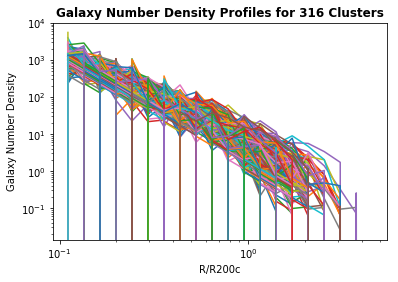

R_avg: 0.6982244391252947
Rmax_list: [1.3280076, 1.711756, 1.5610569, 1.6879034, 2.1744728, 1.6084954, 1.6712394, 1.8458252, 1.2041478, 1.5363575, 1.6136098, 1.4473686, 1.2585247, 2.0040758, 1.4508549, 1.1486049, 2.2576675, 2.903064, 1.85229, 1.8103445, 1.0514941, 3.1170206, 2.1657348, 1.780066, 2.2047398, 1.2322907, 1.3333524, 1.7034097, 1.3237178, 2.2414794, 1.2003801, 2.1937907, 1.0524186, 2.7535207, 3.5576003, 2.312443, 2.1586478, 1.6497698, 1.4909953, 2.0866988, 1.3502595, 1.699537, 2.0972915, 1.0684441, 1.4308753, 1.4059935, 1.5951569, 1.7059721, 1.0667516, 1.9059974, 1.4038466, 2.0995173, 1.389817, 1.9110792, 1.3321853, 1.3032626, 1.3270646, 2.4328506, 1.9011108, 2.6588788, 1.9845538, 1.256914, 1.4655832, 2.8205116, 2.1419508, 1.4667588, 1.5191082, 2.281196, 2.9330354, 1.3570163, 1.7665392, 1.3859499, 1.1245502, 1.4906052, 1.7301228, 1.3214043, 0.8069425, 1.618137, 2.3211062, 1.487538, 1.0555279, 2.1285527, 1.7142245, 1.4286313, 2.511805, 2.528558, 0.9392687, 1.4744961, 1.614008

/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'dlog of Number Density')

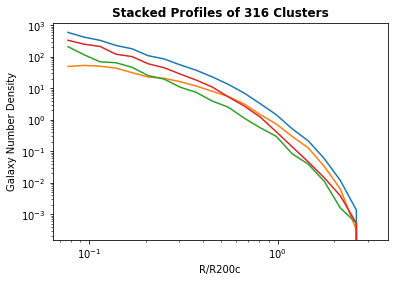

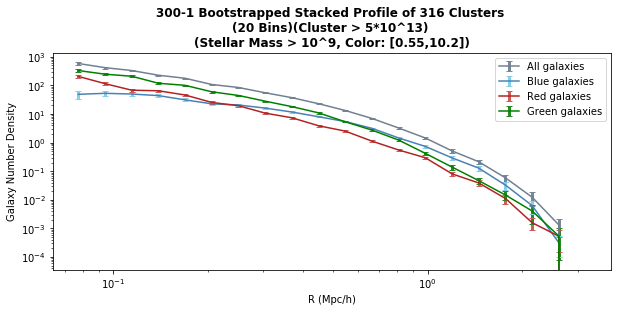

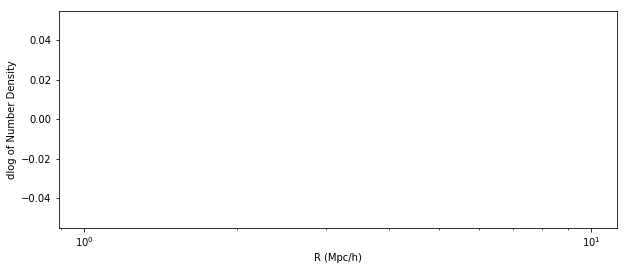

In [32]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 20#30#15
Rmin = .1
Rmax = 5#3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
NDensity_list_g = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
ND_boot_g = []
RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))
    print("N Subhalos after total masking:", len(subhalo_grp['SubhaloGrNr'][mask_total]))
    
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo,blue_mask_subs,red_mask_subs,green_mask_subs)    


    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)
    NDensity_list_g.append(NDensity_green)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2
print("Rmax_list:", Rmax_list)
# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_b, '-')
plt.plot(bin_stack, NDensity_stack_r, '-')
plt.plot(bin_stack, NDensity_stack_g, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green, cov_green, boot_err_green = Bootstrap_Covariance(NDensity_list_g, 300, bins)
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack, (Yi_avg_green), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack, Yi_avg_red, yerr = boot_err_red, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))
plt.show()


In [33]:
# CONTINUED PLOTTING OF COLOR SPLIT PROFILES

#Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
#Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
#Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
z = -3
bin_stack = bin_stack
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack[:z], (Yi_avg)[:z], 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack[:z], (Yi_avg_blue)[:z], 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack[:z], (Yi_avg_red[:z]), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack[:z], (Yi_avg_green[:z]), 1000)  

#print(Yi_avg_red)
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(12,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack[:z], Yi_avg_red[:z], yerr = boot_err_red[:z], c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(.05,1.4)
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
#dlog_data_SG_x, dlog_data_SG_y = get_slope_sg(bin_stack, (Yi_avg), 1000)  
#dlog_data_SG_x_b, dlog_data_SG_y_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
#dlog_data_SG_x_r, dlog_data_SG_y_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
plt.figure(figsize = (12,4))#(6,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.ylim(-6.5,4)
#plt.xlim(.6,1.2)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))


#print(len(r_subhalo),len(r_subhalo[blue_mask_subs]), len(r_subhalo[red_mask_subs]))


NameError: name 'Yi_avg_blue' is not defined

# Mass Split profiles

Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after first masking: 1909
N Subhalos after total masking (> 10^8): 248
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
galaxies [6, 5, 9, 5, 25, 25, 30, 30, 32, 44, 27, 4, 0, 0, 0]
mass1 galaxies counted [2, 1, 3, 2, 15, 17, 12, 16, 20, 22, 15, 2, 0, 0, 0]
mass2 galaxies counted [2, 2, 4, 1, 7, 5, 10, 9, 9, 13, 9, 2, 0, 0, 0]
mass3 galaxies counted [2, 2, 1, 2, 3, 2, 8, 5, 3, 9, 3, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 242

Halo: 13
Halo Mass: 27343.611
N Subhalos: 1930
N Subhalos after first masking: 1884
N Subhalos after total masking (> 10^8): 303
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
galaxies [3, 0, 0, 2, 5, 6, 22, 46, 57, 63, 48, 28, 15, 2, 0]
mass1 galaxies counted [2, 0, 0, 2, 2, 4, 11, 26, 30, 31, 23, 22, 8, 1, 0]
mass2 galaxies counted [1, 0, 0, 0, 2, 2, 9, 10, 14, 17, 13, 5, 3, 1, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 0, 1, 10, 12, 14, 

N Subhalos after first masking: 1496
N Subhalos after total masking (> 10^8): 189
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
galaxies [3, 2, 6, 12, 17, 19, 20, 21, 40, 27, 11, 7, 3, 0, 0]
mass1 galaxies counted [1, 1, 1, 6, 8, 15, 11, 7, 21, 16, 6, 6, 2, 0, 0]
mass2 galaxies counted [1, 1, 3, 2, 6, 4, 7, 10, 17, 7, 4, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 2, 4, 3, 0, 2, 3, 1, 4, 1, 1, 1, 0, 0]
mass4 galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 188

Halo: 28
Halo Mass: 18303.37
N Subhalos: 1259
N Subhalos after first masking: 1246
N Subhalos after total masking (> 10^8): 162
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
galaxies [1, 4, 4, 14, 5, 13, 14, 23, 23, 34, 14, 4, 0, 0, 0]
mass1 galaxies counted [0, 3, 3, 8, 4, 7, 5, 10, 6, 17, 7, 1, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 2, 1, 2, 8, 7, 8, 12, 4, 3, 0, 0, 0]
mass3 galaxies counted [0, 1, 1, 4, 0, 3, 1, 6, 7, 5, 3, 0, 0,

N Subhalos after first masking: 1201
N Subhalos after total masking (> 10^8): 176
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
galaxies [0, 1, 2, 7, 13, 19, 13, 21, 28, 25, 16, 21, 5, 4, 1]
mass1 galaxies counted [0, 0, 2, 2, 5, 9, 5, 13, 15, 15, 9, 10, 3, 2, 1]
mass2 galaxies counted [0, 1, 0, 2, 5, 7, 5, 6, 6, 4, 5, 6, 2, 2, 0]
mass3 galaxies counted [0, 0, 0, 2, 3, 3, 3, 2, 6, 6, 2, 4, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 176

Halo: 43
Halo Mass: 15200.831
N Subhalos: 1214
N Subhalos after first masking: 1206
N Subhalos after total masking (> 10^8): 163
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
galaxies [1, 5, 8, 6, 12, 28, 18, 28, 17, 26, 7, 1, 0, 0, 0]
mass1 galaxies counted [1, 2, 2, 3, 6, 10, 7, 20, 8, 14, 3, 1, 0, 0, 0]
mass2 galaxies counted [0, 2, 2, 2, 5, 8, 9, 5, 6, 6, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 4, 1, 1, 7, 2, 3, 3, 6, 2, 0, 0, 0, 

N Subhalos after first masking: 858
N Subhalos after total masking (> 10^8): 144
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [6, 3, 5, 7, 15, 12, 13, 19, 9, 17, 15, 11, 6, 2, 1]
mass1 galaxies counted [4, 1, 2, 4, 6, 8, 5, 10, 6, 7, 7, 7, 3, 0, 0]
mass2 galaxies counted [1, 2, 1, 3, 5, 2, 5, 8, 1, 3, 4, 4, 2, 2, 0]
mass3 galaxies counted [1, 0, 2, 0, 3, 2, 3, 1, 2, 7, 3, 0, 0, 0, 1]
mass4 galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
sum of galaxies: 141

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking (> 10^8): 170
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 1, 0, 2, 1, 10, 28, 26, 26, 36, 27, 13, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 2, 0, 5, 10, 9, 13, 20, 15, 7, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 1, 3, 11, 14, 11, 9, 11, 5, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 1, 7, 3, 1, 7, 0, 1, 0, 0]

N Subhalos after first masking: 728
N Subhalos after total masking (> 10^8): 109
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
galaxies [1, 3, 9, 8, 6, 7, 14, 17, 14, 16, 7, 0, 0, 0, 0]
mass1 galaxies counted [0, 1, 5, 3, 4, 5, 6, 10, 9, 12, 6, 0, 0, 0, 0]
mass2 galaxies counted [1, 1, 4, 2, 2, 2, 5, 4, 3, 4, 1, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 102

Halo: 73
Halo Mass: 11412.425
N Subhalos: 955
N Subhalos after first masking: 940
N Subhalos after total masking (> 10^8): 118
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
galaxies [4, 4, 4, 4, 5, 7, 9, 9, 19, 28, 10, 11, 1, 0, 0]
mass1 galaxies counted [2, 2, 1, 2, 1, 5, 5, 5, 13, 14, 5, 6, 1, 0, 0]
mass2 galaxies counted [0, 1, 2, 2, 3, 1, 2, 2, 3, 9, 3, 3, 0, 0, 0]
mass3 galaxies counted [2, 1, 1, 0, 1, 1, 2, 2, 3, 5, 2, 1, 0, 0, 0]
mass4 g

N Subhalos after first masking: 847
N Subhalos after total masking (> 10^8): 122
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
galaxies [3, 2, 2, 5, 9, 9, 16, 7, 20, 19, 17, 12, 0, 0, 0]
mass1 galaxies counted [2, 0, 1, 3, 5, 5, 9, 4, 6, 10, 10, 5, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 1, 2, 1, 3, 2, 10, 5, 5, 6, 0, 0, 0]
mass3 galaxies counted [0, 2, 1, 1, 2, 1, 4, 1, 4, 4, 2, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 121

Halo: 88
Halo Mass: 10377.713
N Subhalos: 915
N Subhalos after first masking: 904
N Subhalos after total masking (> 10^8): 119
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
galaxies [1, 2, 3, 1, 5, 5, 4, 20, 24, 20, 14, 9, 1, 0, 0]
mass1 galaxies counted [0, 1, 2, 0, 1, 4, 3, 13, 15, 8, 10, 5, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 1, 1, 1, 0, 5, 5, 6, 2, 1, 1, 0, 0]
mass3 galaxies counted [1, 0, 0, 0, 3, 0, 1, 2, 4, 6, 2, 3, 0, 0, 0]
mass4

N Subhalos after first masking: 767
N Subhalos after total masking (> 10^8): 103
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
galaxies [1, 0, 1, 0, 10, 15, 12, 14, 8, 12, 13, 8, 9, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 4, 8, 8, 4, 5, 6, 10, 5, 5, 0, 0]
mass2 galaxies counted [1, 0, 0, 0, 5, 1, 0, 7, 1, 4, 1, 2, 4, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 5, 4, 3, 2, 2, 1, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 103
Halo Mass: 9901.212
N Subhalos: 770
N Subhalos after first masking: 763
N Subhalos after total masking (> 10^8): 103
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
galaxies [2, 1, 4, 5, 7, 7, 6, 11, 11, 15, 15, 11, 7, 1, 0]
mass1 galaxies counted [1, 0, 1, 2, 3, 3, 2, 8, 8, 8, 5, 4, 3, 0, 0]
mass2 galaxies counted [0, 0, 2, 2, 3, 2, 3, 0, 3, 5, 6, 5, 3, 1, 0]
mass3 galaxies counted [1, 0, 1, 1, 1, 2, 1, 3, 0, 2, 4, 2, 1, 0, 0]
mass4 galax

N Subhalos after first masking: 687
N Subhalos after total masking (> 10^8): 107
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [5, 4, 7, 4, 5, 6, 19, 19, 14, 13, 6, 1, 0, 0, 0]
mass1 galaxies counted [2, 1, 3, 2, 3, 3, 7, 14, 9, 4, 2, 0, 0, 0, 0]
mass2 galaxies counted [1, 2, 3, 1, 0, 3, 8, 3, 3, 6, 3, 1, 0, 0, 0]
mass3 galaxies counted [2, 1, 1, 1, 2, 0, 4, 2, 2, 2, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking (> 10^8): 115
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 1, 2, 4, 7, 11, 6, 8, 7, 17, 26, 20, 4, 2, 0]
mass1 galaxies counted [0, 0, 2, 2, 3, 5, 2, 4, 4, 5, 13, 8, 1, 2, 0]
mass2 galaxies counted [0, 1, 0, 0, 4, 4, 2, 4, 0, 10, 10, 9, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0]
mass4 gal

N Subhalos after first masking: 659
N Subhalos after total masking (> 10^8): 86
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
galaxies [3, 2, 1, 5, 5, 4, 8, 11, 15, 19, 8, 1, 0, 0, 0]
mass1 galaxies counted [2, 0, 0, 0, 4, 1, 4, 4, 13, 12, 3, 1, 0, 0, 0]
mass2 galaxies counted [1, 2, 1, 4, 1, 3, 4, 4, 1, 4, 3, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 1, 3, 2, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 82

Halo: 133
Halo Mass: 8327.565
N Subhalos: 503
N Subhalos after first masking: 495
N Subhalos after total masking (> 10^8): 70
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
galaxies [0, 5, 2, 5, 2, 6, 7, 9, 10, 9, 2, 11, 0, 0, 0]
mass1 galaxies counted [0, 3, 0, 1, 2, 3, 3, 1, 4, 6, 1, 5, 0, 0, 0]
mass2 galaxies counted [0, 2, 2, 1, 0, 3, 2, 4, 5, 3, 1, 4, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 0, 2, 0, 0, 0]
mass4 galaxies c

N Subhalos after first masking: 729
N Subhalos after total masking (> 10^8): 94
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
galaxies [0, 0, 0, 2, 1, 6, 4, 7, 13, 18, 15, 23, 5, 0, 0]
mass1 galaxies counted [0, 0, 0, 2, 0, 2, 3, 4, 2, 11, 8, 14, 3, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 0, 2, 5, 7, 6, 6, 1, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 5, 0, 1, 2, 1, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 94

Halo: 148
Halo Mass: 8410.298
N Subhalos: 755
N Subhalos after first masking: 745
N Subhalos after total masking (> 10^8): 79
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
galaxies [0, 2, 1, 3, 2, 9, 21, 10, 9, 12, 1, 4, 1, 2, 2]
mass1 galaxies counted [0, 1, 1, 3, 0, 3, 9, 8, 9, 1, 0, 2, 1, 0, 2]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 6, 2, 0, 8, 1, 1, 0, 1, 0]
mass3 galaxies counted [0, 1, 0, 0, 0, 3, 5, 0, 0, 3, 0, 1, 0, 1, 0]
mass4 galaxies

N Subhalos after first masking: 651
N Subhalos after total masking (> 10^8): 91
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
galaxies [0, 1, 0, 8, 6, 8, 16, 18, 14, 9, 4, 3, 3, 0, 0]
mass1 galaxies counted [0, 0, 0, 5, 2, 4, 8, 12, 6, 5, 1, 1, 3, 0, 0]
mass2 galaxies counted [0, 1, 0, 1, 1, 3, 4, 3, 7, 3, 2, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 3, 0, 4, 3, 1, 1, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 90

Halo: 163
Halo Mass: 7904.2363
N Subhalos: 617
N Subhalos after first masking: 602
N Subhalos after total masking (> 10^8): 93
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
galaxies [2, 0, 1, 10, 16, 8, 12, 12, 14, 11, 1, 1, 0, 0, 0]
mass1 galaxies counted [1, 0, 1, 6, 6, 2, 8, 6, 9, 7, 1, 0, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 4, 4, 2, 4, 5, 4, 3, 0, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 6, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0]
mass4 galaxie

N Subhalos after first masking: 815
N Subhalos after total masking (> 10^8): 90
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 1, 0, 0, 0, 4, 4, 2, 12, 14, 11, 8, 10, 17, 2]
mass1 galaxies counted [0, 0, 0, 0, 0, 2, 1, 2, 5, 9, 8, 6, 6, 8, 0]
mass2 galaxies counted [0, 1, 0, 0, 0, 1, 2, 0, 4, 3, 3, 1, 2, 5, 2]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 4, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking (> 10^8): 89
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [2, 3, 3, 4, 3, 8, 20, 8, 17, 8, 5, 4, 1, 0, 0]
mass1 galaxies counted [1, 2, 2, 1, 0, 5, 12, 4, 12, 6, 2, 2, 1, 0, 0]
mass2 galaxies counted [1, 1, 0, 2, 0, 1, 6, 1, 4, 2, 3, 2, 0, 0, 0]
mass3 galaxies counted [0, 0, 1, 1, 3, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0]
mass4 galaxie

N Subhalos after first masking: 501
N Subhalos after total masking (> 10^8): 64
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
galaxies [2, 1, 3, 3, 2, 8, 3, 20, 11, 6, 2, 1, 0, 0, 0]
mass1 galaxies counted [1, 1, 1, 2, 1, 6, 0, 9, 5, 3, 1, 1, 0, 0, 0]
mass2 galaxies counted [0, 0, 2, 0, 1, 2, 1, 6, 3, 2, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 0, 1, 0, 0, 2, 4, 3, 1, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 62

Halo: 193
Halo Mass: 7080.1284
N Subhalos: 633
N Subhalos after first masking: 619
N Subhalos after total masking (> 10^8): 94
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
galaxies [0, 0, 0, 1, 0, 1, 3, 2, 8, 9, 5, 10, 20, 20, 14]
mass1 galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 4, 3, 3, 6, 15, 10, 11]
mass2 galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 3, 5, 1, 3, 2, 8, 1]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1]
mass4 galaxi

N Subhalos after first masking: 478
N Subhalos after total masking (> 10^8): 62
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
galaxies [3, 2, 3, 1, 4, 2, 5, 10, 13, 8, 5, 4, 0, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 1, 2, 2, 6, 8, 7, 3, 2, 0, 0, 0]
mass2 galaxies counted [2, 2, 0, 1, 3, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 208
Halo Mass: 6570.345
N Subhalos: 476
N Subhalos after first masking: 471
N Subhalos after total masking (> 10^8): 63
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
galaxies [1, 1, 2, 5, 4, 8, 11, 5, 13, 4, 6, 0, 0, 0, 0]
mass1 galaxies counted [0, 1, 1, 1, 2, 7, 7, 4, 6, 2, 3, 0, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 2, 1, 1, 3, 1, 7, 1, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
mass4 galaxies count

N Subhalos after first masking: 427
N Subhalos after total masking (> 10^8): 75
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
galaxies [0, 6, 4, 2, 2, 8, 10, 6, 10, 8, 11, 6, 1, 0, 0]
mass1 galaxies counted [0, 2, 1, 1, 1, 4, 6, 2, 5, 6, 6, 3, 1, 0, 0]
mass2 galaxies counted [0, 4, 3, 1, 0, 2, 2, 3, 1, 2, 4, 3, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 2, 2, 1, 4, 0, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 74

Halo: 223
Halo Mass: 6099.7847
N Subhalos: 524
N Subhalos after first masking: 512
N Subhalos after total masking (> 10^8): 67
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
galaxies [1, 2, 3, 3, 3, 7, 9, 5, 16, 7, 6, 3, 2, 0, 0]
mass1 galaxies counted [0, 1, 1, 3, 2, 6, 5, 1, 7, 6, 4, 1, 2, 0, 0]
mass2 galaxies counted [0, 0, 1, 0, 1, 1, 1, 2, 6, 0, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 1, 0, 0, 0, 2, 2, 3, 1, 1, 2, 0, 0, 0]
mass4 galaxies co

N Subhalos after total masking (> 10^8): 52
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 2, 2, 3, 2, 4, 3, 7, 8, 10, 5, 4, 0, 0, 0]
mass1 galaxies counted [0, 1, 0, 1, 1, 1, 1, 4, 4, 4, 1, 3, 0, 0, 0]
mass2 galaxies counted [0, 1, 2, 1, 1, 2, 1, 2, 3, 5, 1, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking (> 10^8): 57
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 1, 3, 4, 5, 6, 4, 5, 10, 7, 6, 2, 0, 0, 0]
mass1 galaxies counted [0, 0, 2, 3, 2, 2, 2, 2, 4, 5, 4, 1, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 0, 2, 1, 0, 2, 5, 1, 2, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
galaxies [2, 3, 5, 4, 3, 6, 4, 6, 7, 2, 5, 1, 0, 0, 0]
mass1 galaxies counted [0, 1, 2, 3, 3, 2, 2, 3, 6, 0, 4, 1, 0, 0, 0]
mass2 galaxies counted [2, 0, 1, 1, 0, 4, 1, 3, 0, 1, 0, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 48

Halo: 253
Halo Mass: 5553.335
N Subhalos: 329
N Subhalos after first masking: 316
N Subhalos after total masking (> 10^8): 54
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
galaxies [2, 2, 1, 1, 5, 3, 7, 10, 12, 9, 0, 0, 0, 0, 0]
mass1 galaxies counted [1, 1, 0, 0, 2, 1, 3, 2, 5, 6, 0, 0, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 1, 2, 2, 3, 6, 6, 1, 0, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 52

Halo: 254
H

R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
galaxies [0, 1, 0, 5, 2, 2, 7, 12, 16, 4, 6, 2, 3, 0, 0]
mass1 galaxies counted [0, 0, 0, 3, 2, 0, 4, 7, 11, 1, 4, 1, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 2, 2, 3, 1, 1, 1, 1, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 2, 0, 0, 1, 2, 4, 1, 1, 0, 1, 0, 0]
mass4 galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 268
Halo Mass: 5499.5674
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking (> 10^8): 58
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
galaxies [0, 0, 3, 3, 5, 5, 5, 12, 9, 11, 2, 1, 0, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 4, 3, 3, 5, 3, 6, 0, 0, 0, 0, 0]
mass2 galaxies counted [0, 0, 2, 2, 1, 1, 1, 5, 1, 5, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 2, 5, 0, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 56

Halo: 

R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
galaxies [2, 0, 0, 2, 4, 5, 7, 8, 8, 8, 3, 3, 0, 0, 0]
mass1 galaxies counted [0, 0, 0, 0, 1, 3, 3, 4, 7, 6, 2, 0, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 1, 2, 3, 0, 0, 0, 2, 0, 0, 0]
mass4 galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 283
Halo Mass: 5127.922
N Subhalos: 363
N Subhalos after first masking: 358
N Subhalos after total masking (> 10^8): 51
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
galaxies [1, 2, 1, 5, 9, 2, 3, 6, 2, 6, 6, 6, 1, 0, 0]
mass1 galaxies counted [0, 1, 1, 2, 5, 2, 3, 4, 2, 5, 5, 4, 1, 0, 0]
mass2 galaxies counted [0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0]
mass3 galaxies counted [1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 284


N Subhalos after first masking: 544
N Subhalos after total masking (> 10^8): 60
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 1, 1, 1, 1, 6, 11, 7, 10, 2, 7, 10, 2, 1, 0]
mass1 galaxies counted [0, 1, 1, 0, 0, 3, 6, 3, 7, 1, 3, 3, 2, 0, 0]
mass2 galaxies counted [0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 3, 3, 0, 1, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 0, 3, 2, 2, 0, 1, 4, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking (> 10^8): 60
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 1, 1, 5, 3, 6, 7, 8, 7, 13, 4, 2, 0, 0, 0]
mass1 galaxies counted [0, 1, 1, 4, 2, 2, 4, 6, 4, 6, 1, 2, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 2, 1, 1, 3, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 2, 4, 1, 0, 0, 0, 0]
mass4 galaxies cou

N Subhalos after first masking: 474
N Subhalos after total masking (> 10^8): 56
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
galaxies [0, 2, 1, 2, 4, 5, 4, 5, 7, 13, 4, 6, 0, 0, 0]
mass1 galaxies counted [0, 1, 0, 1, 1, 3, 4, 3, 4, 8, 1, 3, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 3, 3, 0, 0, 0]
mass3 galaxies counted [0, 1, 1, 0, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 320
Halo Mass: 5094.6997
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking (> 10^8): 54
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
galaxies [0, 0, 0, 0, 0, 1, 0, 6, 6, 10, 15, 9, 6, 1, 0]
mass1 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 8, 4, 3, 1, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 4, 2, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 3, 1, 0, 0]
mass4 galaxies co

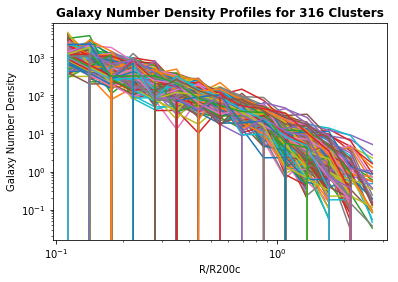

R_avg: 0.6982244391252947


Text(0, 0.5, 'dlog of Number Density')

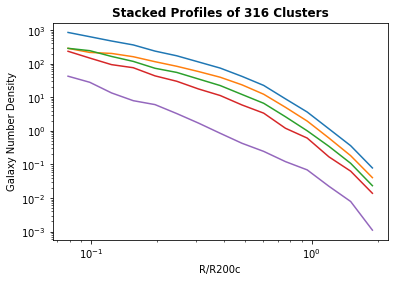

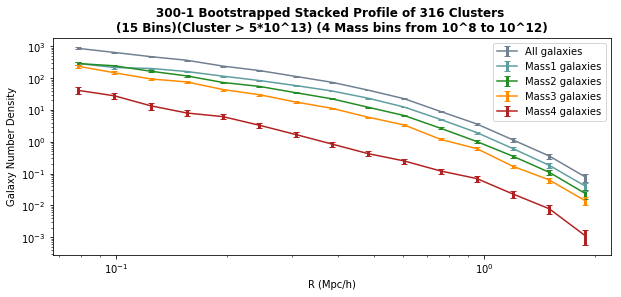

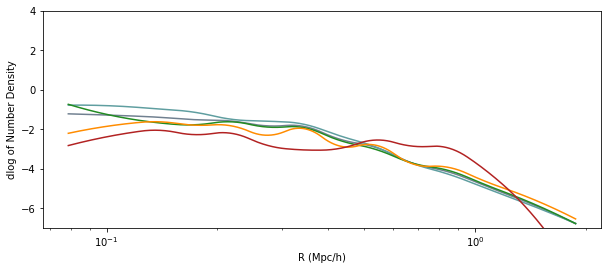

In [41]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))&(halo_grp['GroupNsubs']>=5)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 15#30#15
Rmin = .1#.1
Rmax = 3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_1 = []
NDensity_list_2 = []
NDensity_list_3 = []
NDensity_list_4 = []

ND_boot = []
ND_boot_1 = []
ND_boot_2 = []
ND_boot_3 = []
ND_boot_4 = []

RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)#&(subhalomass > (10**9))
    mask_total2 = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass >= (10**8))
    print("N Subhalos after total masking (> 10^8):", len(subhalo_grp['SubhaloGrNr'][mask_total2]))

    '''
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    '''
    #MASS BIN CUTS:
    #subhalomass_masked = subhalomass[mask_total]
    massmask1 = (subhalomass[mask_total2]>=(10**8))&(subhalomass[mask_total2]<(10**9))
    massmask2 = (subhalomass[mask_total2]>=(10**9))&(subhalomass[mask_total2]<(10**10))
    massmask3 = (subhalomass[mask_total2]>=(10**10))&(subhalomass[mask_total2]<(10**11))
    massmask4 = (subhalomass[mask_total2]>=(10**11))&(subhalomass[mask_total2]<(10**12))

    #print(len(subhalomass[mask_total][massmask1]))
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total2]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    #print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]/.704
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_1 = []
    NDensity_2 = []
    NDensity_3 = []
    NDensity_4 = []

    galaxies = []
    galaxies_1 = []
    galaxies_2 = []
    galaxies_3 = []
    galaxies_4 = []
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_1 = len(r_subhalo[mask_sep & massmask1])
        number_2 = len(r_subhalo[mask_sep & massmask2])
        number_3 = len(r_subhalo[mask_sep & massmask3])
        number_4 = len(r_subhalo[mask_sep & massmask4])


        NDensity_1.append(number_1/volume)
        NDensity_2.append(number_2/volume)
        NDensity_3.append(number_3/volume)        
        NDensity_4.append(number_4/volume)        

        galaxies_1.append(number_1)
        galaxies_2.append(number_2)
        galaxies_3.append(number_3)
        galaxies_4.append(number_4)

    print("galaxies", galaxies)
    print("mass1 galaxies counted", galaxies_1)
    print("mass2 galaxies counted", galaxies_2)
    print("mass3 galaxies counted", galaxies_3)
    print("mass4 galaxies counted", galaxies_4)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_1.append(NDensity_1)
    NDensity_list_2.append(NDensity_2)
    NDensity_list_3.append(NDensity_3)
    NDensity_list_4.append(NDensity_4)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_1 = np.mean(NDensity_list_1, axis=0)
NDensity_stack_2 = np.mean(NDensity_list_2, axis=0)
NDensity_stack_3 = np.mean(NDensity_list_3, axis=0)
NDensity_stack_4 = np.mean(NDensity_list_4, axis=0)

plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_1, '-')
plt.plot(bin_stack, NDensity_stack_2, '-')
plt.plot(bin_stack, NDensity_stack_3, '-')
plt.plot(bin_stack, NDensity_stack_4, '-')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_1, cov_1, boot_err_1 = Bootstrap_Covariance(NDensity_list_1, 300, bins)
Yi_avg_2, cov_2, boot_err_2 = Bootstrap_Covariance(NDensity_list_2, 300, bins)
Yi_avg_3, cov_3, boot_err_3 = Bootstrap_Covariance(NDensity_list_3, 300, bins)
Yi_avg_4, cov_4, boot_err_4 = Bootstrap_Covariance(NDensity_list_4, 300, bins)

dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_1, dlog_data_SG_y_1, yy_fine_1, xx_fine_1 = get_slope_sg(bin_stack, (Yi_avg_1), 1000)  
dlog_data_SG_x_2, dlog_data_SG_y_2, yy_fine_2, xx_fine_2 = get_slope_sg(bin_stack, (Yi_avg_2), 1000)  
dlog_data_SG_x_3, dlog_data_SG_y_3, yy_fine_3, xx_fine_3 = get_slope_sg(bin_stack, (Yi_avg_3), 1000)  
dlog_data_SG_x_4, dlog_data_SG_y_4, yy_fine_4, xx_fine_4 = get_slope_sg(bin_stack, (Yi_avg_4), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'slategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_1, yerr = boot_err_1, c = 'cadetblue',ecolor = 'cadetblue', elinewidth = 3, capsize=3, label = 'Mass1 galaxies')
plt.errorbar(bin_stack, Yi_avg_2, yerr = boot_err_2, c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Mass2 galaxies')
plt.errorbar(bin_stack, Yi_avg_3, yerr = boot_err_3, c='darkorange', ecolor = 'darkorange', elinewidth = 3, capsize=3, label = 'Mass3 galaxies')
plt.errorbar(bin_stack, Yi_avg_4, yerr = boot_err_4, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Mass4 galaxies')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) (4 Mass bins from 10^8 to 10^12)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_1, dlog_data_SG_y_1, c = 'cadetblue')
plt.plot(dlog_data_SG_x_2, dlog_data_SG_y_2, c = 'forestgreen')
plt.plot(dlog_data_SG_x_3, dlog_data_SG_y_3, c = 'darkorange')
plt.plot(dlog_data_SG_x_4, dlog_data_SG_y_4, c = 'firebrick')
plt.ylim(-7,4)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')


Text(1.7, 3, 'SG: 5,3')

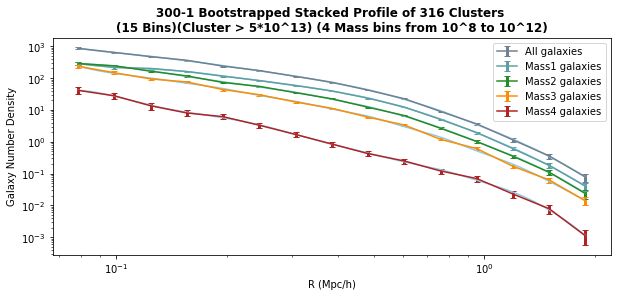

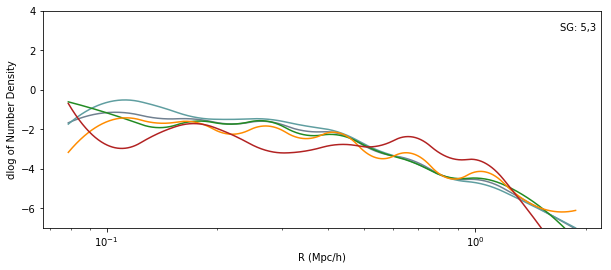

In [53]:
#Continued plotting of mass split profiles
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_1, dlog_data_SG_y_1, yy_fine_1, xx_fine_1 = get_slope_sg(bin_stack, (Yi_avg_1), 1000)  
dlog_data_SG_x_2, dlog_data_SG_y_2, yy_fine_2, xx_fine_2 = get_slope_sg(bin_stack, (Yi_avg_2), 1000)  
dlog_data_SG_x_3, dlog_data_SG_y_3, yy_fine_3, xx_fine_3 = get_slope_sg(bin_stack, (Yi_avg_3), 1000)  
dlog_data_SG_x_4, dlog_data_SG_y_4, yy_fine_4, xx_fine_4 = get_slope_sg(bin_stack, (Yi_avg_4), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'slategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_1, yerr = boot_err_1, c = 'cadetblue',ecolor = 'cadetblue', elinewidth = 3, capsize=3, label = 'Mass1 galaxies')
plt.errorbar(bin_stack, Yi_avg_2, yerr = boot_err_2, c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Mass2 galaxies')
plt.errorbar(bin_stack, Yi_avg_3, yerr = boot_err_3, c='darkorange', ecolor = 'darkorange', elinewidth = 3, capsize=3, label = 'Mass3 galaxies')
plt.errorbar(bin_stack, Yi_avg_4, yerr = boot_err_4, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Mass4 galaxies')
plt.plot(xx_fine, yy_fine, c = 'skyblue')
plt.plot(xx_fine_1, yy_fine_1, c = 'skyblue')
plt.plot(xx_fine_2, yy_fine_2, c = 'skyblue')
plt.plot(xx_fine_3, yy_fine_3, c = 'skyblue')
plt.plot(xx_fine_4, yy_fine_4, c = 'skyblue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) (4 Mass bins from 10^8 to 10^12)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_1, dlog_data_SG_y_1, c = 'cadetblue')
plt.plot(dlog_data_SG_x_2, dlog_data_SG_y_2, c = 'forestgreen')
plt.plot(dlog_data_SG_x_3, dlog_data_SG_y_3, c = 'darkorange')
plt.plot(dlog_data_SG_x_4, dlog_data_SG_y_4, c = 'firebrick')
plt.ylim(-7,4)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))


# Histograms of halos

18767465
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]
2686
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]


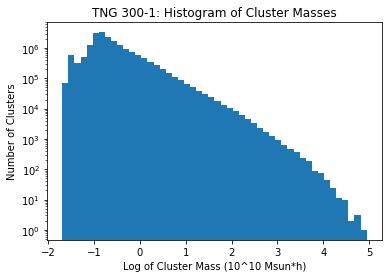

Count of subhalos: 15904796
Number of Total groups in Snapshot: 18767465
Number of Total subgroups in Snapshot: 15904796


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Halos with subhalos: 12952011
Halos with more than 5 subhalos: 88076


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[

Subhalos not flagged and with DM mass > 10^11: 15594
Number of halos with mass > 10^13 Msun: 100


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Number of halos with mass > 10^13 Msun: 100


Text(0, 0.5, 'Number of Clusters (Log Scaled)')

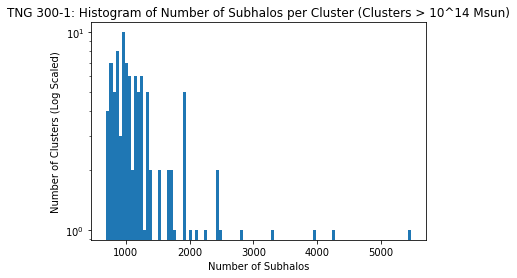

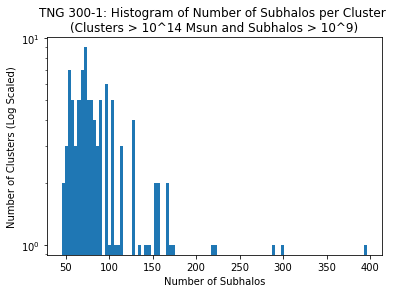

In [6]:
#HISTOGRAMS
print(halo_grp['count'])
Cluster_masses = halo_grp['GroupMass']

print(Cluster_masses[:20])
cluster_mass_mask = (Cluster_masses >= (10**3))
print(len((Cluster_masses)[cluster_mass_mask]))
print(((Cluster_masses)[cluster_mass_mask])[:20])
plt.hist((np.log10(Cluster_masses)), bins=50)#bins=[0,100])
plt.title('TNG 300-1: Histogram of Cluster Masses')
plt.xlabel('Log of Cluster Mass (10^10 Msun*h)')
plt.ylabel('Number of Clusters')
plt.yscale('log')
plt.show()

print("Count of subhalos:",subhalo_grp['count'])
print("Number of Total groups in Snapshot:", header['Ngroups_Total'])
print("Number of Total subgroups in Snapshot:", header['Nsubgroups_Total'])
grp_first_sub = halo_grp['GroupFirstSub']
mask = [grp_first_sub != -1]
print("Halos with subhalos:",len(grp_first_sub[mask]))
print("Halos with more than 5 subhalos:", len(halo_grp['GroupNsubs'][halo_grp['GroupNsubs']>5]))
mask_flag = [subhalo_grp['SubhaloFlag'] == True]
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
mask_mass = [subhalomass>11]
print("Subhalos not flagged and with DM mass > 10^11:", len((subhalo_grp['SubhaloFlag'])[mask_flag and mask_mass]))
mask_halomass = [(halo_grp['GroupMass'])>=(10**4)]
print("Number of halos with mass > 10^13 Msun:", len(halo_grp['GroupMass'][mask_halomass]))

#Histogram of number of subhalos
plt.figure()
x = (halo_grp['GroupNsubs'])[mask_halomass]#[halo_grp['GroupNsubs']>0]
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist((x), bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster (Clusters > 10^14 Msun)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')

# SUBHALO MASS CUTS AND HISTOGRAM OF SUBHALSO PER CLUSTER
#mask_halomass = ((halo_grp['GroupMass'])>=((10**3)))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^13 Msun:", Number_of_halos)
halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
halo_subhalos = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]
mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    #print("\nHalo:", h_i)
    #print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    #print("Halo Mass:", halo_grp['GroupMass'][h_i])
    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    iFS = halo_grp['GroupFirstSub'][h_i]
    #print(subhalo_grp['SubhaloGrNr'][iFS]) #635-783 is halo  in subhalo catalog
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    #print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    mask = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))    #mask = [subhalo_grp['SubhaloFlag']==True]
    subhalos = len(subhalo_grp['SubhaloGrNr'][mask])
    halo_subhalos.append(subhalos)
halo_subhalos = np.array(halo_subhalos)

plt.figure()
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist(halo_subhalos, bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster \n(Clusters > 10^14 Msun and Subhalos > 10^9)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')
